# Crime Through the Years: Unveiling Trends and Patterns (2017-Present)

# Table of Contents

- [Introduction](#Introduction)
    - [Why Is This Important?](#Why-Is-This-Important?)
    - [Objectives](#Objectives)
- [Part 1: Data Curation](#Part-1:-Data-Curation)
  - [Dataset Description](#Dataset-Description)
  - [Preprocessing Steps](#Preprocessing-Steps)
- [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis)
  - [Analysis 1: Distribution of Incident Types](#Analysis-1:-Distribution-of-Incident-Types)
  - [Analysis 2: Relationship between Clearance_Code_Inc_Type and PGPD_Reporting_Area](#Analysis-2:-Relationship-between-Clearance_Code_Inc_Type-and-PGPD_Reporting_Area)
  - [Analysis 3: Number of Incidents in a PGPD Reporting Area](#Analysis-3:-Number-of-Incidents-in-a-PGPD-Reporting-Area)
- [Part 3: Visualizations](#Part-3:-Visualizations)
  - [Number of Incident Cases Over Time](#Number-of-Incident-Cases-Over-Time)
  - [Total crime rate at each month](#Total-crime-rate-at-each-month)
- [Part 4: Machine Learning Analysis](#Part-4:-Machine-Learning-Analysis)
  - [SARIMAX](#SARIMAX)
  - [K-Means](#K-Means)
  - [Decision Tree](#Decision-Tree)
  - [Random Forest](#Random-Forest)
  - [Neural Network](#Neural-Network)
  - [PCA](#PCA)
- [Part 5: Insights and Conclusions](#Part-5:-Insights-and-Conclusions)
- [Part 6: Data Science Ethics](#Part-6:-Data-Science-Ethics)

# Introduction

Understanding crime is a critical step of fostering safe and thriving communities. Crime can influence people's decisions about where to live, work, and invest, directly impacting the overall quality of life. Awareness of crime trends not only helps residents assess safety risks but also give awarness to policymakers and law enforcement agencies to allocate resources more effectively.

This project focuses on analyzing crime data from Prince George's County, Maryland, spanning February 2017 to the present. By examining two comprehensive datasets:
1. **Crime Incidents February 2017 to July 2023**, and
2. **Crime Incidents July 2023 to Present**,

we aim to uncover key trends and patterns in crime over time. These datasets provide detailed information on various crime types, including traffic accidents, assaults, burglaries, and homicides, making it possible to explore correlations, long-term trends, and geographic crime hotspots.

### Why Is This Important?

Crime affects every aspect of a community's social dynamics. Understanding these dynamics is crucial for improving public safety and addressing underlying issues that contribute to crime. Specifically, this project seeks to:
- Identify crime trends and patterns to help predict future incidents.
- Highlight areas with high crime density using geographic visualizations.
- Analyze temporal patterns to understand how crime varies by time of day, season, or year.

### Objectives

The primary objectives of this project include:
1. Analyzing trends in crime rates over the years.
2. Identifying crime hotspots and understanding their impact on community safety.
3. Leveraging advanced data science methods and geographic visualizations to draw meaningful insights from the data.
4. Using machine learning to predict future crime incidents based on historical trends.


# Part 1: Data Curation

### Dataset Description
We used two datasets from the Prince Geroge's County Open Data Protal:
1. [Crime Incidents February 2017 to July 2023](<https://data.princegeorgescountymd.gov/Public-Safety/Crime-Incidents-February-2017-to-5th-July-2023/wb4e-w4nf/about_data>).
2. [Crime Incidents July 2023 to Present](<https://data.princegeorgescountymd.gov/Public-Safety/Crime-Incidents-July-2023-to-Present/xjru-idbe/about_data>).

These datasets provide detailed information about crime incidents in Prince George's County, Maryland. Key columns include:
- **clearance_code_inc_type**: Type of crime (e.g., Assault, Burglary, Traffic Accident).
- **Location**: Area where the crime occurred.
- **Date**: Date of the incident.
- **Incidents Case ID**: Unique identifier for each incident.

To get started, we import the necessary Python libraries for data manipulation and visualization which is shown below:





In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, classification_report, mean_squared_error, silhouette_score, confusion_matrix
import folium
from folium.plugins import MarkerCluster
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from graphviz import Source
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
!pip install ipyleaflet
from ipyleaflet import Map, Marker, basemaps
!pip install haversine
from haversine import haversine, Unit
import ast
import calendar
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

**We begin by loading the datasets into pandas DataFrames for cleaning and analysis.**

In [ ]:
data_till_2023 = pd.read_csv('Crime_Incidents_February_2017_to_5th_July_2023_20241007.csv')
data_till_2023.head()

,Incident_case_id,Date,Clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,PGPD Beat,Street_Number,Street_Address,Latitude,Longitude,Location
0,PP21062600000233,06/26/2021,ACCIDENT WITH IMPOUND,107,A,A7,NaN,20TH AVE / RUATAN ST,38.996895,-76.974891,"(38.9968950599432, -76.9748905301094)"
1,PP21062600000290,06/26/2021,"AUTO, STOLEN & RECOVERED",107,A,A7,NaN,20TH AVE / RUATAN ST,38.996895,-76.974891,"(38.9968950599432, -76.9748905301094)"
2,PP21062600000552,06/26/2021,THEFT FROM AUTO,501,K,K2,4000 BLOCK,4008 23RD PKWY NB,38.834822,-76.961111,"(38.8348218947649, -76.9611110240221)"
3,PP21062700000596,06/27/2021,ACCIDENT,424,H,H6,3200 BLOCK,3253 WALTERS LN,38.844664,-76.891885,"(38.8446643948555, -76.8918854445219)"
4,PP21062500000426,06/25/2021,THEFT FROM AUTO,314,G,G4,1800 BLOCK,1801 BELLE HAVEN DR NB,38.913890,-76.881715,"(38.9138899743557, -76.8817148655653)"


In [ ]:
data_after_2023 = pd.read_csv('Crime_Incidents_July_2023_to_Present_20241007.csv')
data_after_2023.head()

,incident_case_id,date,clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,PGPD BEAT,street_number,street_address,latitude,longitude,location
0,PP24020800000446,02/08/2024 12:00:00 AM,THEFT FROM AUTO,508,TRU,K3,4200 BLOCK,4203 28TH AVE EB,38.831869,-76.946675,"(38.83186914026737,-76.94667536020279)"
1,PP24020600001384,02/06/2024 12:00:00 AM,"AUTO, STOLEN",110,A,A4,8100 BLOCK,8101 15TH AVE,38.989021,-76.981124,"(38.98902106285095,-76.98112411797047)"
2,PP24020800000345,02/08/2024 12:00:00 AM,ACCIDENT WITH IMPOUND,312,G,G2,6500 BLOCK,6510 MARTIN LUTHER KING JUNIOR HWY WB,38.908313,-76.893854,"(38.90831255912781,-76.89385394752026)"
3,PP24020600001074,02/06/2024 12:00:00 AM,SEX OFFENSE,701,E,E3,10100 BLOCK,10115 PRINCE PL,38.892236,-76.832502,"(38.89223647117615,-76.8325023651123)"
4,PP24020400000604,02/04/2024 12:00:00 AM,"AUTO, STOLEN",858,E,E2,9400 BLOCK,9401 LOTTSFORD RD EB,38.905688,-76.841361,"(38.905687898397446,-76.84136061370373)"


### Preprocessing Steps
Next step we will be cleaning and preparing the data for analysis which consist of:
1. Change the data format:
   - Convert the value in the`date` column to `yyyy-mm-dd`
   - Remove unnecessary time components.
   - Renaming the columns for consistency
3. Merged the two datasets into a single DataFrame for unified analysis.
4. Grouped and combined related values in the `clearance_code_inc_type` column to reduce unique entries.
5. Identified and removed duplicate rows based on the `incident_case_id` column.
6. Handled missing values by:
   - Identify columns with missing data.
   - Replace missing values with appropriate placeholders or drop rows where necessary."
7. Reset the index after data pre-processing
8. Categorizing Incident Types from Clearance Codes

Below is the Python code used to perform these steps:

#### Step 1: Change Date Format ####

In [ ]:
#changed date format to yyyy-mm-dd
data_till_2023['Date'] = pd.to_datetime(data_till_2023['Date'], errors='coerce')
data_till_2023.head()

,Incident_case_id,Date,Clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,PGPD Beat,Street_Number,Street_Address,Latitude,Longitude,Location
0,PP21062600000233,2021-06-26,ACCIDENT WITH IMPOUND,107,A,A7,NaN,20TH AVE / RUATAN ST,38.996895,-76.974891,"(38.9968950599432, -76.9748905301094)"
1,PP21062600000290,2021-06-26,"AUTO, STOLEN & RECOVERED",107,A,A7,NaN,20TH AVE / RUATAN ST,38.996895,-76.974891,"(38.9968950599432, -76.9748905301094)"
2,PP21062600000552,2021-06-26,THEFT FROM AUTO,501,K,K2,4000 BLOCK,4008 23RD PKWY NB,38.834822,-76.961111,"(38.8348218947649, -76.9611110240221)"
3,PP21062700000596,2021-06-27,ACCIDENT,424,H,H6,3200 BLOCK,3253 WALTERS LN,38.844664,-76.891885,"(38.8446643948555, -76.8918854445219)"
4,PP21062500000426,2021-06-25,THEFT FROM AUTO,314,G,G4,1800 BLOCK,1801 BELLE HAVEN DR NB,38.913890,-76.881715,"(38.9138899743557, -76.8817148655653)"


In [ ]:
#The date has time in it but it says 12:00 AM for all the rows, so removed them and set a standard date format for the entire data_after_2023 dataset.
data_after_2023['date'] = pd.to_datetime(data_after_2023['date'], errors='coerce')
data_after_2023.head()

<ipython-input-7-55df57617d3b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_after_2023['date'] = pd.to_datetime(data_after_2023['date'], errors='coerce')


,incident_case_id,date,clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,PGPD BEAT,street_number,street_address,latitude,longitude,location
0,PP24020800000446,2024-02-08,THEFT FROM AUTO,508,TRU,K3,4200 BLOCK,4203 28TH AVE EB,38.831869,-76.946675,"(38.83186914026737,-76.94667536020279)"
1,PP24020600001384,2024-02-06,"AUTO, STOLEN",110,A,A4,8100 BLOCK,8101 15TH AVE,38.989021,-76.981124,"(38.98902106285095,-76.98112411797047)"
2,PP24020800000345,2024-02-08,ACCIDENT WITH IMPOUND,312,G,G2,6500 BLOCK,6510 MARTIN LUTHER KING JUNIOR HWY WB,38.908313,-76.893854,"(38.90831255912781,-76.89385394752026)"
3,PP24020600001074,2024-02-06,SEX OFFENSE,701,E,E3,10100 BLOCK,10115 PRINCE PL,38.892236,-76.832502,"(38.89223647117615,-76.8325023651123)"
4,PP24020400000604,2024-02-04,"AUTO, STOLEN",858,E,E2,9400 BLOCK,9401 LOTTSFORD RD EB,38.905688,-76.841361,"(38.905687898397446,-76.84136061370373)"


In [ ]:
#Renaming the columns to lowercase
data_till_2023 = data_till_2023.rename(columns={'Incident_case_id': 'incident_case_id', 'Date': 'date',
                                                'Clearance_code_inc_type': 'clearance_code_inc_type',
                                                'PGPD Reporting Area': 'pgpd_reporting_area',
                                                'PGPD Sector': 'pgpd_sector', 'PGPD Beat' : 'pgpd_beat',
                                                'Street_Number': 'street_number', 'Street_Address' : 'street_address',
                                                'Latitude': 'latitude', 'Longitude': 'longitude', 'Location ': 'location'})

data_after_2023 = data_after_2023.rename(columns={'incident_case_id': 'incident_case_id', 'date': 'date',
                                                'clearance_code_inc_type': 'clearance_code_inc_type',
                                                'PGPD Reporting Area': 'pgpd_reporting_area',
                                                'PGPD Sector': 'pgpd_sector', 'PGPD BEAT' : 'pgpd_beat',
                                                'street_Number': 'street_number', 'street_Address' : 'street_address',
                                                'latitude': 'latitude', 'longitude': 'longitude', 'location ': 'location'})

In [ ]:
data_till_2023.head()

,incident_case_id,date,clearance_code_inc_type,pgpd_reporting_area,pgpd_sector,pgpd_beat,street_number,street_address,latitude,longitude,location
0,PP21062600000233,2021-06-26,ACCIDENT WITH IMPOUND,107,A,A7,NaN,20TH AVE / RUATAN ST,38.996895,-76.974891,"(38.9968950599432, -76.9748905301094)"
1,PP21062600000290,2021-06-26,"AUTO, STOLEN & RECOVERED",107,A,A7,NaN,20TH AVE / RUATAN ST,38.996895,-76.974891,"(38.9968950599432, -76.9748905301094)"
2,PP21062600000552,2021-06-26,THEFT FROM AUTO,501,K,K2,4000 BLOCK,4008 23RD PKWY NB,38.834822,-76.961111,"(38.8348218947649, -76.9611110240221)"
3,PP21062700000596,2021-06-27,ACCIDENT,424,H,H6,3200 BLOCK,3253 WALTERS LN,38.844664,-76.891885,"(38.8446643948555, -76.8918854445219)"
4,PP21062500000426,2021-06-25,THEFT FROM AUTO,314,G,G4,1800 BLOCK,1801 BELLE HAVEN DR NB,38.913890,-76.881715,"(38.9138899743557, -76.8817148655653)"


In [ ]:
data_after_2023.head()

,incident_case_id,date,clearance_code_inc_type,pgpd_reporting_area,pgpd_sector,pgpd_beat,street_number,street_address,latitude,longitude,location
0,PP24020800000446,2024-02-08,THEFT FROM AUTO,508,TRU,K3,4200 BLOCK,4203 28TH AVE EB,38.831869,-76.946675,"(38.83186914026737,-76.94667536020279)"
1,PP24020600001384,2024-02-06,"AUTO, STOLEN",110,A,A4,8100 BLOCK,8101 15TH AVE,38.989021,-76.981124,"(38.98902106285095,-76.98112411797047)"
2,PP24020800000345,2024-02-08,ACCIDENT WITH IMPOUND,312,G,G2,6500 BLOCK,6510 MARTIN LUTHER KING JUNIOR HWY WB,38.908313,-76.893854,"(38.90831255912781,-76.89385394752026)"
3,PP24020600001074,2024-02-06,SEX OFFENSE,701,E,E3,10100 BLOCK,10115 PRINCE PL,38.892236,-76.832502,"(38.89223647117615,-76.8325023651123)"
4,PP24020400000604,2024-02-04,"AUTO, STOLEN",858,E,E2,9400 BLOCK,9401 LOTTSFORD RD EB,38.905688,-76.841361,"(38.905687898397446,-76.84136061370373)"


#### Step 2: Merging the Data ####

In [ ]:
#Merged both datasets
df = pd.concat([data_till_2023, data_after_2023], axis=0).reset_index(drop=True)
df

,incident_case_id,date,clearance_code_inc_type,pgpd_reporting_area,pgpd_sector,pgpd_beat,street_number,street_address,latitude,longitude,location
0,PP21062600000233,2021-06-26,ACCIDENT WITH IMPOUND,107,A,A7,NaN,20TH AVE / RUATAN ST,38.996895,-76.974891,"(38.9968950599432, -76.9748905301094)"
1,PP21062600000290,2021-06-26,"AUTO, STOLEN & RECOVERED",107,A,A7,NaN,20TH AVE / RUATAN ST,38.996895,-76.974891,"(38.9968950599432, -76.9748905301094)"
2,PP21062600000552,2021-06-26,THEFT FROM AUTO,501,K,K2,4000 BLOCK,4008 23RD PKWY NB,38.834822,-76.961111,"(38.8348218947649, -76.9611110240221)"
3,PP21062700000596,2021-06-27,ACCIDENT,424,H,H6,3200 BLOCK,3253 WALTERS LN,38.844664,-76.891885,"(38.8446643948555, -76.8918854445219)"
4,PP21062500000426,2021-06-25,THEFT FROM AUTO,314,G,G4,1800 BLOCK,1801 BELLE HAVEN DR NB,38.913890,-76.881715,"(38.9138899743557, -76.8817148655653)"
...,...,...,...,...,...,...,...,...,...,...,...
185529,PP24100800001879,2024-10-08,THEFT,113,A,A3,1500 BLOCK,1545 UNIVERSITY BLVD EB,38.984756,-76.981452,"(38.98475597798824,-76.98145219683647)"
185530,PP24100200001311,2024-10-02,ACCIDENT,846,D,D6,NaN,MARTIN LUTHER KING JUNIOR HWY EB / WHITFIELD C...,38.940793,-76.853828,"(38.94079281389713,-76.85382777452469)"
185531,PP24100400000309,2024-10-04,THEFT FROM AUTO,931,C,C3,4700 BLOCK,4700 BRANDON LN,39.040202,-76.917148,"(39.0402020663023,-76.91714785993099)"
185532,PP24100600000591,2024-10-06,"AUTO, STOLEN",441,H,H2,2000 BLOCK,2020 BROOKS DR NB,38.863365,-76.916492,"(38.86336514353752,-76.91649170219898)"


#### Step 3: Grouping values ####

In [ ]:
#Group and combine values within clearance_code_inc_type to reduce uniques
df['clearance_code_inc_type'].unique()

array(['ACCIDENT WITH IMPOUND', 'AUTO, STOLEN & RECOVERED',
       'THEFT FROM AUTO', 'ACCIDENT', 'ASSAULT', 'AUTO, STOLEN', 'THEFT',
       'SEX OFFENSE', 'B & E, RESIDENTIAL', 'ASSAULT, WEAPON',
       'ROBBERY, RESIDENTIAL', 'B & E, COMMERCIAL', 'ROBBERY, OTHER',
       'ROBBERY, VEHICLE', 'ASSAULT, SHOOTING', 'ROBBERY, COMMERCIAL',
       'B & E, OTHER', 'VANDALISM', 'HOMICIDE', 'B & E, VACANT',
       'B & E, RESIDENTIAL (VACANT)', 'B & E, SCHOOL'], dtype=object)

#### Step 4: Identifying and removing duplicates ####

In [ ]:
unique_count = df['incident_case_id'].nunique()
print("Number of unique values:", unique_count)

Number of unique values: 185176


In [ ]:
#rows with duplicate incident_case_id values
duplicate_ids = df[df.duplicated(subset='incident_case_id', keep=False)]

#display the rows with similar incident_case_id values
print(duplicate_ids)

        incident_case_id       date clearance_code_inc_type  \
15358   PP23070500001755 2023-07-05         THEFT FROM AUTO   
15361   PP23070500001484 2023-07-05                ACCIDENT   
15363   PP23070200001839 2023-07-02         THEFT FROM AUTO   
15364   PP23070300002468 2023-07-03            AUTO, STOLEN   
15365   PP23070300000460 2023-07-03            AUTO, STOLEN   
...                  ...        ...                     ...   
175055  PP23070200000074 2023-07-02                ACCIDENT   
175083  PP23070200001790 2023-07-02                   THEFT   
175139  PP23070100000631 2023-07-01         THEFT FROM AUTO   
175158  PP23070400000196 2023-07-04                   THEFT   
175159  PP23070100001094 2023-07-01                   THEFT   

        pgpd_reporting_area pgpd_sector pgpd_beat street_number  \
15358                   304           G        G3    1400 BLOCK   
15361                   890           D        D1    7000 BLOCK   
15363                   858           E   

In [ ]:
#remove duplicates, keeping the first occurrence
df = df.drop_duplicates(subset = 'incident_case_id')
df.shape

(185176, 11)

In [ ]:
#So now the unique values equals the total number of incident case ID's. The redundant/duplicate values are eradicated.
unique= df['incident_case_id'].nunique()
print('unique values:', unique)

unique values: 185176


#### Step 5: Handling missing values ####

In [ ]:
#checking if there are any NaN/missing/empty values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 incident_case_id               0
date                           0
clearance_code_inc_type        0
pgpd_reporting_area            0
pgpd_sector                    1
pgpd_beat                      2
street_number              42206
street_address                 0
latitude                       0
longitude                      0
location                       0
dtype: int64


In [ ]:
#missing values in pgpd_sector
missing_pgpd_sector = df[df['pgpd_sector'].isna()]
print(missing_pgpd_sector)

        incident_case_id       date clearance_code_inc_type  \
104551  PP18030500001254 2018-03-05         THEFT FROM AUTO   

        pgpd_reporting_area pgpd_sector pgpd_beat street_number  \
104551                  502         NaN       NaN    3200 BLOCK   

        street_address   latitude  longitude  \
104551  3202 CURTIS DR  38.846633 -76.953565   

                                       location  
104551  (38.84663289785385, -76.95356510579586)  


In [ ]:
#missing values in pgpd_beat
missing_pgpd_beat = df[df['pgpd_beat'].isna()]
print(missing_pgpd_beat)

        incident_case_id       date clearance_code_inc_type  \
84748   PP21031100001310 2021-03-11         THEFT FROM AUTO   
104551  PP18030500001254 2018-03-05         THEFT FROM AUTO   

        pgpd_reporting_area pgpd_sector pgpd_beat street_number  \
84748                   313         TRU       NaN    2100 BLOCK   
104551                  502         NaN       NaN    3200 BLOCK   

        street_address   latitude  longitude  \
84748   2140 BROOKS DR  38.861069 -76.917148   
104551  3202 CURTIS DR  38.846633 -76.953565   

                                        location  
84748   (38.861068561673164, -76.91714785993099)  
104551   (38.84663289785385, -76.95356510579586)  


In [ ]:
#Filling the empty spots with the value placeholder 'unknown'
df['street_number'].fillna('Unknown', inplace=True)

#Dropping 2 rows that have NA values for pgpd_sector and pgpd_beat since removing them will not significantly impact the dataset
df = df.dropna(subset=['pgpd_sector', 'pgpd_beat'])

<ipython-input-20-a8755465f89e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['street_number'].fillna('Unknown', inplace=True)
<ipython-input-20-a8755465f89e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['street_number'].fillna('Unknown', inplace=True)


In [ ]:
#checking for missing values after changes
missing_values= df.isnull().sum()
print("the missing values:", missing_values)

the missing values: incident_case_id           0
date                       0
clearance_code_inc_type    0
pgpd_reporting_area        0
pgpd_sector                0
pgpd_beat                  0
street_number              0
street_address             0
latitude                   0
longitude                  0
location                   0
dtype: int64


#### Step 6: Reset the index after data pre-processing ####
**After completing the preprocessing, we reset the index to ensure it starts from 0 and reflects the final sorted dataset.**

In [ ]:
#sort by 'incident_case_id' and reset the index to 0
df = df.sort_values(by='incident_case_id', ascending=True).reset_index(drop=True)
df

,incident_case_id,date,clearance_code_inc_type,pgpd_reporting_area,pgpd_sector,pgpd_beat,street_number,street_address,latitude,longitude,location
0,PP17020200002452,2017-02-02,ACCIDENT,826,D,D1,Unknown,96TH AVE / GOOD LUCK RD,38.980819,-76.846938,"(38.98081897199154, -76.84693802893162)"
1,PP17020300000263,2017-02-03,ACCIDENT,602,J,J4,Unknown,INDIAN HEAD HWY SB / WILSON BRIDGE DR,38.787250,-76.998513,"(38.78724980354309, -76.99851253628731)"
2,PP17020300000798,2017-02-03,THEFT FROM AUTO,219,B,B63,4500 BLOCK,4500 COLLEGE AVE,38.982131,-76.937817,"(38.98213131725788, -76.93781711161137)"
3,PP17020300001861,2017-02-03,THEFT,405,H,H2,1400 BLOCK,1484 ADDISON RD S,38.866974,-76.892214,"(38.86697405576706, -76.89221352338791)"
4,PP17020300001916,2017-02-03,ACCIDENT,423,H,H7,5500 BLOCK,5510 SILVER HILL RD SB,38.852866,-76.913211,"(38.85286647081375, -76.91321086883545)"
...,...,...,...,...,...,...,...,...,...,...,...
185169,PP24100800001879,2024-10-08,THEFT,113,A,A3,1500 BLOCK,1545 UNIVERSITY BLVD EB,38.984756,-76.981452,"(38.98475597798824,-76.98145219683647)"
185170,PP24100800002009,2024-10-08,THEFT,754,F,F7,15900 BLOCK,15922 CRAIN HWY SW,38.672421,-76.872529,"(38.672420650720596,-76.87252852320671)"
185171,PP24100800002046,2024-10-08,ASSAULT,939,C,C3,10800 BLOCK,10800 RHODE ISLAND AVE,39.033312,-76.914195,"(39.03331230580807,-76.91419510543346)"
185172,PP24100800002072,2024-10-08,ACCIDENT,239,B,B3,4700 BLOCK,4705 EDMONSTON RD,38.945386,-76.929287,"(38.94538597762585,-76.92928694188595)"


**However, since the dataset includes only the first 8 days of October 2024, these entries will be removed to avoid skewing the monthly trend analysis**

In [ ]:
df = df[~((df['date'].dt.year == 2024) & (df['date'].dt.month == 10))]

#Verify the change
df.tail()

,incident_case_id,date,clearance_code_inc_type,pgpd_reporting_area,pgpd_sector,pgpd_beat,street_number,street_address,latitude,longitude,location
184504,PP24093000002196,2024-09-30,THEFT FROM AUTO,516,J,J1,600 BLOCK,639 AUDREY LN,38.819402,-76.997528,"(38.81940197944641,-76.99752828478813)"
184505,PP24093000002206,2024-09-30,"AUTO, STOLEN",104,A,A7,200 BLOCK,237 SOUTHAMPTON DR,39.004769,-76.981452,"(39.004769057035446,-76.98145219683647)"
184506,PP24093000002255,2024-09-30,"AUTO, STOLEN",424,H,H6,6100 BLOCK,6116 BLACKSMITH DR,38.839743,-76.900744,"(38.83974313735962,-76.90074369311333)"
184507,PP24093000002289,2024-09-30,ACCIDENT WITH IMPOUND,857,E,E2,2300 BLOCK,2360 LOTTSFORD VISTA RD,38.924717,-76.818395,"(38.92471672594547,-76.818394780159)"
184508,PP24093000002293,2024-09-30,ACCIDENT WITH IMPOUND,841,D,D6,5700 BLOCK,5709 ELLERBIE ST,38.963759,-76.842017,"(38.963758647441864,-76.8420167863369)"


#### Step 7: Categorizing Incident Types from Clearance Codes ####
**We grouped specific incident types into broader categories for better analysis. A custom function was used to match and classify incidents, with unmatched types categorized as "Other.**

In [ ]:
#list of specific incident types
incident_types = ["ACCIDENT","ASSAULT", "AUTO, STOLEN", "B & E", "HOMICIDE", "ROBBERY", "SEX OFFENSE", "THEFT", "VANDALISM"]

#to determine the incident type
def determine_incident_type(clearance_code):
    for incident_type in incident_types:
        if incident_type in clearance_code:
            return incident_type
    return "Other"  # Default value if no match found

#apply the function to create the new column in df
df['incident_type'] = df['clearance_code_inc_type'].apply(determine_incident_type)

other_count = (df['incident_type'] == 'Other').sum()

print("Count of 'Other' incident types:", other_count)

Count of 'Other' incident types: 0


<ipython-input-24-861070cc1064>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['incident_type'] = df['clearance_code_inc_type'].apply(determine_incident_type)


# Part 2: Exploratory Data Analysis

The dataset is now clean and preprocessed and is ready for Exploratory analysis, which is where we explore the data, uncover hidden patterns, and gain insights. This process helps us ensure that we do not miss critical information and can make informed decisions.
To learn more about this analysis, vist this website: [Learn more about EDA](https://www.ibm.com/topics/exploratory-data-analysis).

**Due to the our dataset being mostly categorical variable, we discussed with Dr. Alam and, as per her recommendation, performed only two kinds of statistical tests - Chi Square and ANOVA - rather than the required three different statistical tests for the assignment.**

### Analysis 1: Distribution of Incident Types

We started off with a **Chi-Square Test of Independence**, which helps to evaluate whether there is a significant relationship between the frequency of Clearance_Code_Inc_Type (incident types) and the year in which the incidents occurred. This test helps determine if the distribution of incident types varies significantly over time, using a significance level (α) of 0.05. [Learn more about Chi-Square Test](https://www.jmp.com/en_us/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html#:~:text=The%20Chi%2Dsquare%20test%20of%20independence%20checks%20whether%20two%20variables,idea%20is%20plausible%20or%20not.)

##### **Question that can be answer with this statitiscal test:**
- What are the various incident types and what is their distribution?
- Which incident types are the most common within the dataset?
- Does their distribution in frequency vary over the years?

##### **Hypothesis:**
Null Hypothesis: There is no siginificant difference between the incident type and the year of occurence (independent of each other).

Alternative Hypothesis:There is a siginificant difference between the incident type and the year of occurence (dependent on each other)

In [ ]:
#Types of clearance codes in the dataset
unique_words = df['clearance_code_inc_type'].unique()
print(unique_words)

['ACCIDENT' 'THEFT FROM AUTO' 'THEFT' 'ASSAULT, SHOOTING' 'SEX OFFENSE'
 'B & E, COMMERCIAL' 'AUTO, STOLEN' 'ASSAULT' 'B & E, RESIDENTIAL'
 'ROBBERY, COMMERCIAL' 'B & E, RESIDENTIAL (VACANT)' 'ASSAULT, WEAPON'
 'VANDALISM' 'ROBBERY, OTHER' 'ACCIDENT WITH IMPOUND' 'B & E, OTHER'
 'B & E, VACANT' 'AUTO, STOLEN & RECOVERED' 'HOMICIDE'
 'ROBBERY, RESIDENTIAL' 'B & E, SCHOOL' 'ROBBERY, VEHICLE']


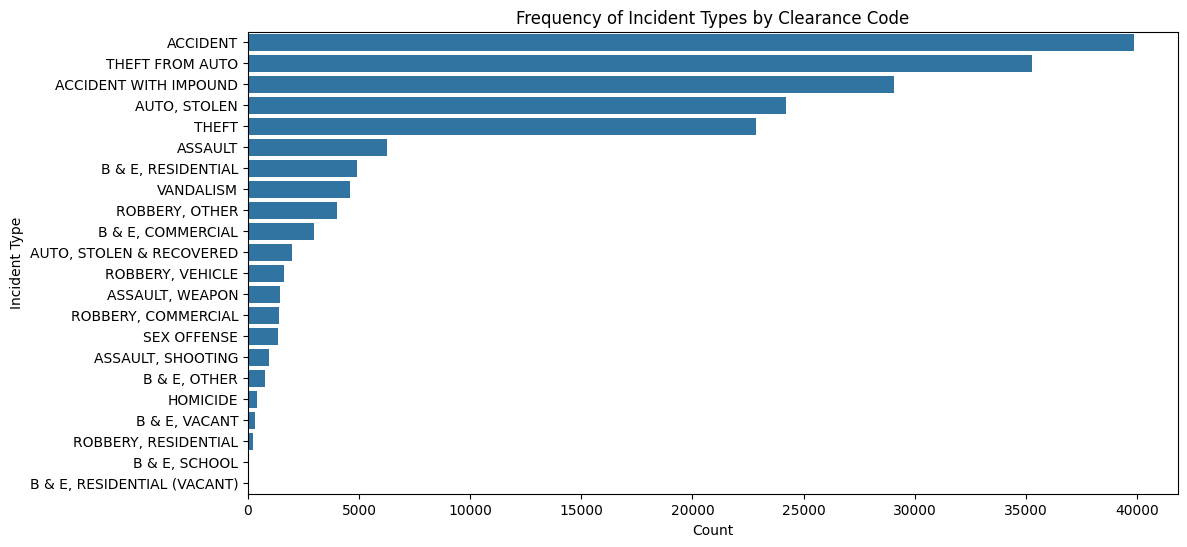

In [ ]:
#Visualize the count of each clearance_code_inc_type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='clearance_code_inc_type', order=df['clearance_code_inc_type'].value_counts().index)
plt.title('Frequency of Incident Types by Clearance Code')
plt.xlabel('Count')
plt.ylabel('Incident Type')
plt.show()

#### Conclusion 1 Part 1:
The top five incident types are accident; theft from auto; accident with impound; auto, stolen; and theft, which account for over 80% of the dataset. We can apply that certain incident types, like accidents and thefts, are over-represented, accounting for over 80% of the dataset.

In [ ]:
#Summary statistics of the clearance code incident type
incident_counts = df['clearance_code_inc_type'].value_counts()
incident_proportions = df['clearance_code_inc_type'].value_counts(normalize=True) * 100

#Display counts and proportions
print("Incident Counts by Type:")
print(incident_counts)

print("\nIncident Proportions by Type (as %):")
print(incident_proportions)

Incident Counts by Type:
clearance_code_inc_type
ACCIDENT                       39850
THEFT FROM AUTO                35276
ACCIDENT WITH IMPOUND          29081
AUTO, STOLEN                   24194
THEFT                          22854
ASSAULT                         6249
B & E, RESIDENTIAL              4893
VANDALISM                       4600
ROBBERY, OTHER                  4015
B & E, COMMERCIAL               2989
AUTO, STOLEN & RECOVERED        1972
ROBBERY, VEHICLE                1623
ASSAULT, WEAPON                 1436
ROBBERY, COMMERCIAL             1389
SEX OFFENSE                     1341
ASSAULT, SHOOTING                931
B & E, OTHER                     771
HOMICIDE                         399
B & E, VACANT                    320
ROBBERY, RESIDENTIAL             229
B & E, SCHOOL                     50
B & E, RESIDENTIAL (VACANT)       45
Name: count, dtype: int64

Incident Proportions by Type (as %):
clearance_code_inc_type
ACCIDENT                       21.598097
THEFT FR

year                         2017  2018  2019  2020  2021  2022  2023  2024
clearance_code_inc_type                                                    
ACCIDENT                     3608  4131  5464  4955  5752  5953  5789  4198
ACCIDENT WITH IMPOUND        3331  3918  3919  3286  3975  3878  3911  2863
ASSAULT                       867   881   803   769   691   744   852   642
ASSAULT, SHOOTING              52    68    68   133   166   164   149   131
ASSAULT, WEAPON               192   175   193   181   171   189   194   141
AUTO, STOLEN                 2331  2289  2141  2155  2364  3105  6287  3522
AUTO, STOLEN & RECOVERED      182   191   157   166   137   182   594   363
B & E, COMMERCIAL             361   367   251   395   310   443   506   356
B & E, OTHER                  144   111   100   153    58    64    81    60
B & E, RESIDENTIAL           1056  1006   649   515   433   484   426   324
B & E, RESIDENTIAL (VACANT)    11    16    18     0     0     0     0     0
B & E, SCHOO

<ipython-input-29-4b267eb31324>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
<ipython-input-29-4b267eb31324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-29-4b267eb31324>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

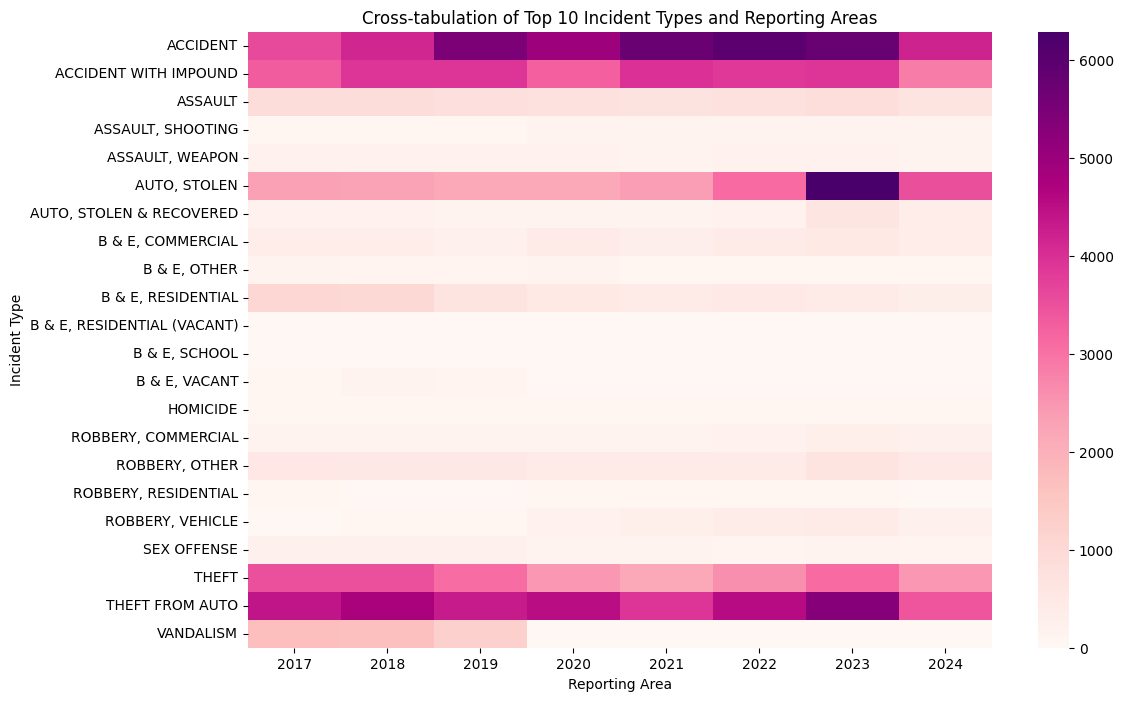

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

contingency_table = pd.crosstab(df['clearance_code_inc_type'], df['year'])
print(contingency_table)

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_val}")

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='RdPu', annot=False)
plt.title('Cross-tabulation of Top 10 Incident Types and Reporting Areas')
plt.xlabel('Reporting Area')
plt.ylabel('Incident Type')
plt.show()

#### Conclusion 1 Part 2:
The top five incident types also show a statistically significant difference in frequency over eight years with a Chi-Square Statistic of 16077.283 and P-value of ~0.0 at an alpha level of 0.05, which allows us to reject the null hypothesis. It could be interesting to look further into what could explain the difference in frequency for these particular incidents, especially as these incidents are all related to theft or accidents involving vehicles.

### Analysis 2: Relationship between Clearance_Code_Inc_Type and PGPD_Reporting_Area

We did another **Chi-Square Test of Independence** to determine whether there is a signficant association/relationship between Clearance_Code_Inc_Type and PGPD_Reporting_Area at an alpha level of 0.05.

##### **Question that can be answered:**  
Are certain incident types more likely to be found in certain Prince George's County Police Department reporting area?

##### **Hypothesis:**
Null Hypothesis: There is no siginificant relationship or association between the top ten types of incidents and in which PGPD reporting area they occur.

Alternative Hypothesis: There is a significant association or relationship between the top ten types of incidents and the PGPD reporting area in they occur.

Chi-Square Statistic: 41428.188066199, P-value: 0.0


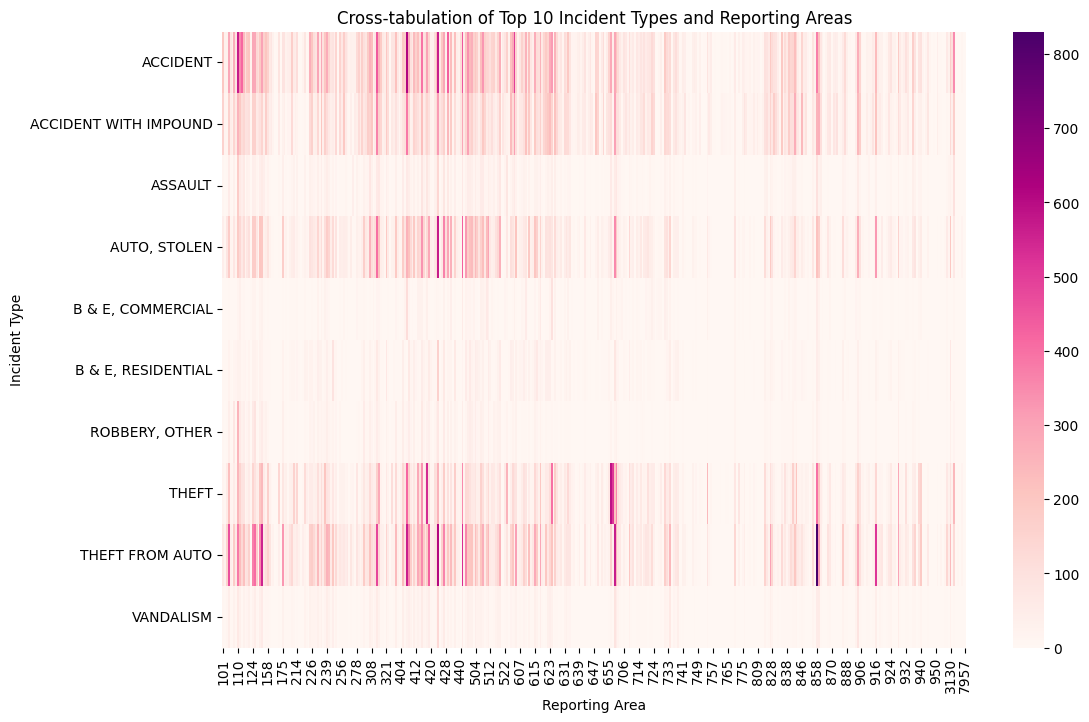

In [ ]:
from scipy.stats import chi2_contingency

#only the top 10 incident types
top_incidents = df['clearance_code_inc_type'].value_counts().nlargest(10).index
filtered_df = df[df['clearance_code_inc_type'].isin(top_incidents)]

#contingency table for the top incident types
contingency_table = pd.crosstab(filtered_df['clearance_code_inc_type'], filtered_df['pgpd_reporting_area'])

#Chi-Square Test of Independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

#display result
print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_val}")


#plot
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='RdPu', annot=False)
plt.title('Cross-tabulation of Top 10 Incident Types and Reporting Areas')
plt.xlabel('Reporting Area')
plt.ylabel('Incident Type')
plt.show()

#### Conclusion 2:
With the Chi-Square statistic of 41,434 and the p-value of 0.0, we can reject the null hypothesis that there is no significant association between incident types and reporting areas at an alpha-level of 0.05. The data implies that certain types of incidents are more likely to occur in specific areas, and the heatmap that we generated shows the distribution of incidents, with the darker colors indicating areas where specific incident types are more likely to happen.

### Analysis 3: Number of Incidents in a PGPD Reporting Area

The next statistical test we did was the **ANOVA test** which can help identify whether there is a relationship between the year and frequency of incidents (or number of incidents occuring) with an alpha level of 0.05. [Learn more about ANOVA](https://www.investopedia.com/terms/a/anova.asp)

##### **Question that can be answered:**
- What is the distribution of incident occurences in a PGPD reporting area?
- Do certain areas have higher incident occurences than others?
- Is it possible to predict with the date on the reporting area by year?

##### **Hypothesis:**
Null Hypothesis: There is no statistically significant difference in the number of incidents for each year.

Alternative Hypothesis: There is a statistically significant difference in the number of incidents for each year.

In [ ]:
#Group by reporting area and count incidents
incident_counts = df.groupby('pgpd_reporting_area').size()

reporting_areas= df['pgpd_reporting_area'].nunique()
print('Number of Reporting Areas:', reporting_areas)

#Summary statistics of incident counts
incident_counts.describe(include='all')

Number of Reporting Areas: 402


,0
count,402.000000
mean,458.972637
std,497.520166
min,1.000000
25%,97.250000
50%,282.000000
75%,634.750000
max,3061.000000


(0.999, 22.1]       41
(1160.8, 3061.0]    41
(22.1, 70.4]        40
(70.4, 128.3]       40
(202.4, 282.0]      40
(128.3, 202.4]      40
(282.0, 407.2]      40
(407.2, 536.5]      40
(536.5, 772.8]      40
(772.8, 1160.8]     40
Name: count, dtype: int64


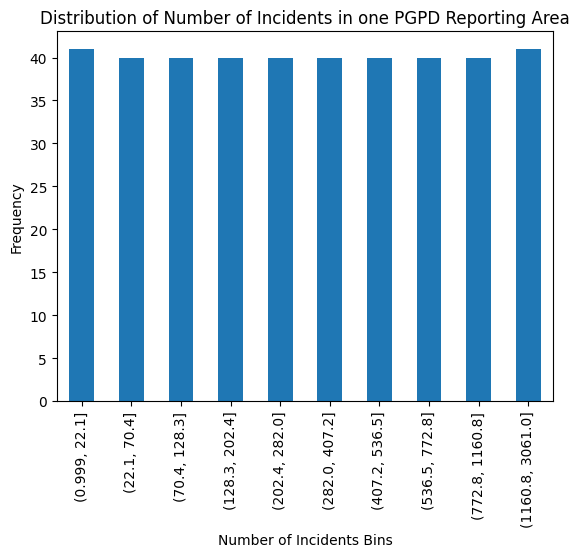

In [ ]:
#Summary statistics indicate data is skewed, so use equal binning to visualize the distribution
reporting_area_binned = pd.qcut(incident_counts, q=10)
print(reporting_area_binned.value_counts())
reporting_area_binned.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Incidents in one PGPD Reporting Area')
plt.xlabel('Number of Incidents Bins')
plt.ylabel('Frequency')

plt.show()

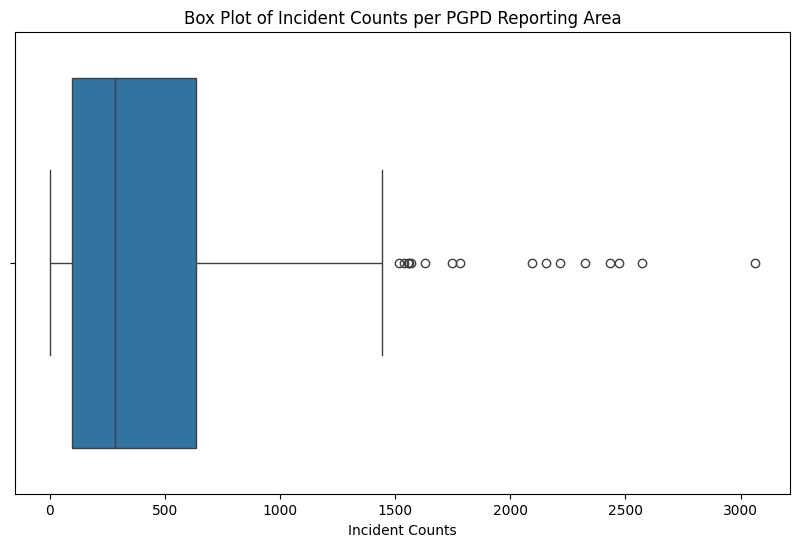

Outliers in reporting areas: pgpd_reporting_area
104    1570
110    2325
135    1745
313    2216
407    2570
408    1536
415    2154
418    1556
424    3061
427    1781
429    1516
441    2431
701    2094
858    2471
904    1559
916    1629
dtype: int64


In [ ]:
#Box plot to visualize outliers in incident counts per reporting area
plt.figure(figsize=(10, 6))
sns.boxplot(x=incident_counts)
plt.title('Box Plot of Incident Counts per PGPD Reporting Area')
plt.xlabel('Incident Counts')
plt.show()

#Identify outliers using IQR method
Q1 = incident_counts.quantile(0.25)
Q3 = incident_counts.quantile(0.75)
IQR = Q3 - Q1

#Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = incident_counts[(incident_counts < lower_bound) | (incident_counts > upper_bound)]

print(f"Outliers in reporting areas: {outliers}")


#### Conclusion 3 Part 1:
The boxplot identified seventeen outliers where the number of incidents is significantly higher than in most other areas. This suggests that these reporting areas may experience higher levels of crime activity. Both figures also indicate a right skew in the distribution.

In [ ]:
cut_df = df.copy()
#cut_df['date'] = cut_df['date'].dt.year
cut_df['date'] = pd.to_datetime(cut_df['date'])
cut_df['date'] = cut_df['date'].dt.to_period('M')
cut_df['date'] = cut_df['date'].astype(str)
cut_df

,incident_case_id,date,clearance_code_inc_type,pgpd_reporting_area,pgpd_sector,pgpd_beat,street_number,street_address,latitude,longitude,location,incident_type,year,month,day
0,PP17020200002452,2017-02,ACCIDENT,826,D,D1,Unknown,96TH AVE / GOOD LUCK RD,38.980819,-76.846938,"(38.98081897199154, -76.84693802893162)",ACCIDENT,2017,2,2
1,PP17020300000263,2017-02,ACCIDENT,602,J,J4,Unknown,INDIAN HEAD HWY SB / WILSON BRIDGE DR,38.787250,-76.998513,"(38.78724980354309, -76.99851253628731)",ACCIDENT,2017,2,3
2,PP17020300000798,2017-02,THEFT FROM AUTO,219,B,B63,4500 BLOCK,4500 COLLEGE AVE,38.982131,-76.937817,"(38.98213131725788, -76.93781711161137)",THEFT,2017,2,3
3,PP17020300001861,2017-02,THEFT,405,H,H2,1400 BLOCK,1484 ADDISON RD S,38.866974,-76.892214,"(38.86697405576706, -76.89221352338791)",THEFT,2017,2,3
4,PP17020300001916,2017-02,ACCIDENT,423,H,H7,5500 BLOCK,5510 SILVER HILL RD SB,38.852866,-76.913211,"(38.85286647081375, -76.91321086883545)",ACCIDENT,2017,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184502,PP24093000002196,2024-09,THEFT FROM AUTO,516,J,J1,600 BLOCK,639 AUDREY LN,38.819402,-76.997528,"(38.81940197944641,-76.99752828478813)",THEFT,2024,9,30
184503,PP24093000002206,2024-09,"AUTO, STOLEN",104,A,A7,200 BLOCK,237 SOUTHAMPTON DR,39.004769,-76.981452,"(39.004769057035446,-76.98145219683647)","AUTO, STOLEN",2024,9,30
184504,PP24093000002255,2024-09,"AUTO, STOLEN",424,H,H6,6100 BLOCK,6116 BLACKSMITH DR,38.839743,-76.900744,"(38.83974313735962,-76.90074369311333)","AUTO, STOLEN",2024,9,30
184505,PP24093000002289,2024-09,ACCIDENT WITH IMPOUND,857,E,E2,2300 BLOCK,2360 LOTTSFORD VISTA RD,38.924717,-76.818395,"(38.92471672594547,-76.818394780159)",ACCIDENT,2024,9,30


### We will now use ANOVA to analyze various aspects between both the reporting area and the data of the recent incidents.

Is it possible to predict with the date on the reporting area over the eight years?

In [ ]:
model = ols('pgpd_reporting_area ~ date', data=cut_df).fit()

In [ ]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df         F    PR(>F)
date      4.581329e+07      91.0  1.561411  0.000496
Residual  5.946057e+10  184415.0       NaN       NaN


#### Conclusion 3 Part 2:
The results of the ANOVA are showing that we have a F value of 1.56 showing high variance when categorizing by years. It also shows that we have a large P value (.15), showing that we will have low confidence not satisfying 0.05. Due to both factors, we can conclude that we can not use the recent calendar year dates to predict the reporting area. At an alpha level of 0.05, we fail to reject the null hypothesis.

# Part 3: Visualizations

**Before diving into the machine learning analysis, there are still important insights to uncover within our dataset.**

### Number of Incident Cases Over Time

To start off we will be looking at the number of incident over the years

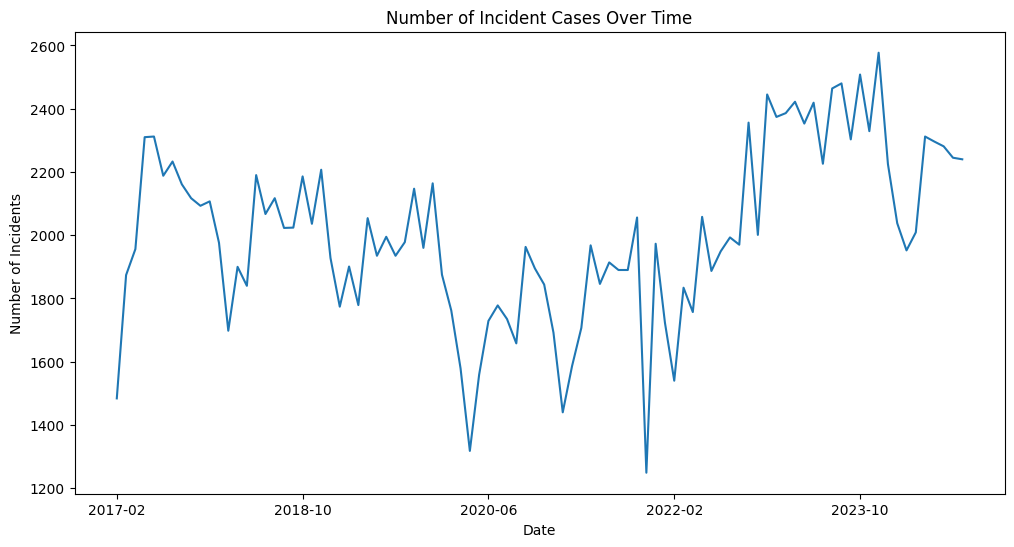

In [ ]:
#visualize number of incident cases over time
plt.figure(figsize=(12, 6))
cut_df['date'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Incident Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

When glancing at the frequency of accident incidents over the past few years, you can visibly see the drop during COVID times (March 2020) which makes sense given a lot of people stopped driving during quarantine. This type of outlier for an extended period of time can influence data if frequency per day is utilized later on.

### Total crime rate at each month

Moving on we are looking at the crime rate at each month

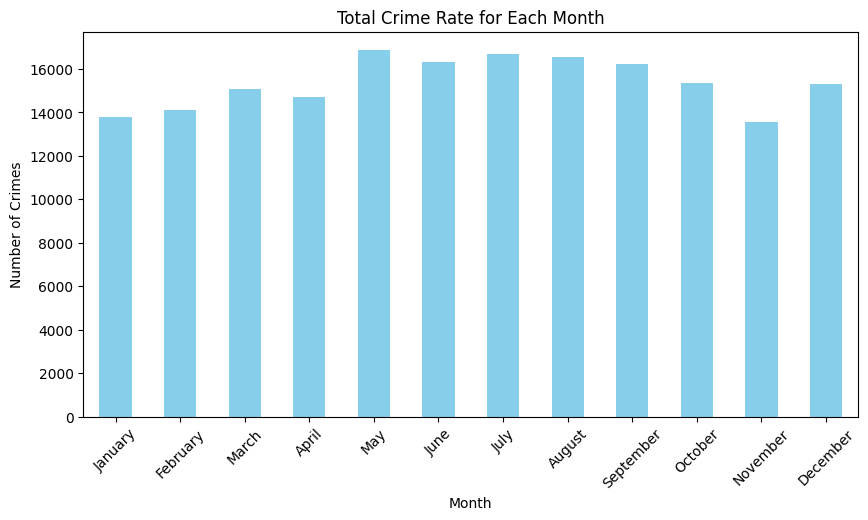

In [ ]:


#sum number of crimes for each month across all years
monthly_crime_counts = df.groupby('month').size()

#convert month integers to month names
monthly_crime_counts.index = [calendar.month_name[month] for month in monthly_crime_counts.index]

#plotting the data
plt.figure(figsize=(10, 5))
monthly_crime_counts.plot(kind='bar', color='skyblue')
plt.title('Total Crime Rate for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

The summer months (May, June, July, and August) exhibit higher crime counts, which could be attributed to increased outdoor activity or seasonal factors.

# Part 4: Machine Learning Analysis

Now that we know more about our dataset, we will now start our Machine Learning Analysis, where we try to create models that make accurate predictions on unseen data. [Learn more about ML](https://www.ibm.com/topics/machine-learning)

We use multiple machine learning tool which consist of:
 - **SARIMAX:** Time Series Analysis and Forecasting for Monthly Crime Data
 - **K-means:** To identify crime hotspots
 - **Decision Tree:** To predict incident type based on spatial and temporal information
 - **Random Forest:** To help improve model performance of predicting incident type
 - **Neural Network:** To add complexity to help improve incident classification
 - **PCA:** To help look at crime severity in different regions.

### SARIMAX

SARIMAX is a a statistical method commonly used for time series analysis and forecasting. Which we will be diving into monthly crime using SARIMAX. [Learn more about SARIMAX](https://www.ecabs.com.mt/using-machine-learning-for-time-series-forecasting-with-sarimax-in-python/#:~:text=What%20is%20SARIMAX%3F,time%20series%20analysis%20and%20forecasting.)



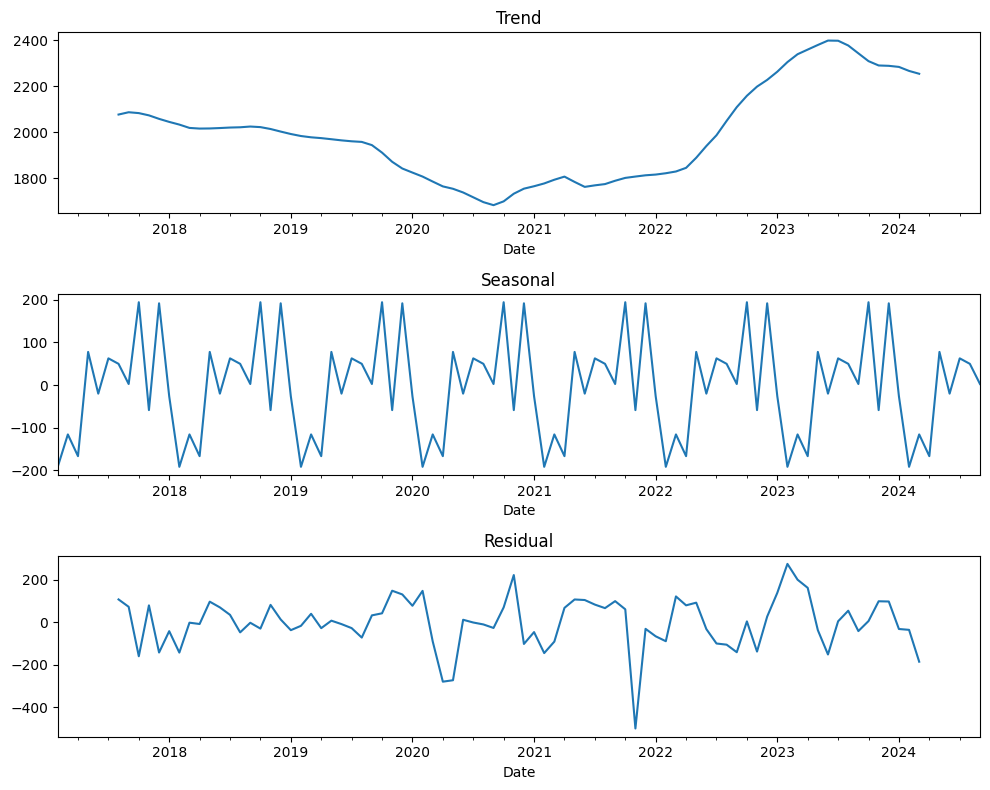

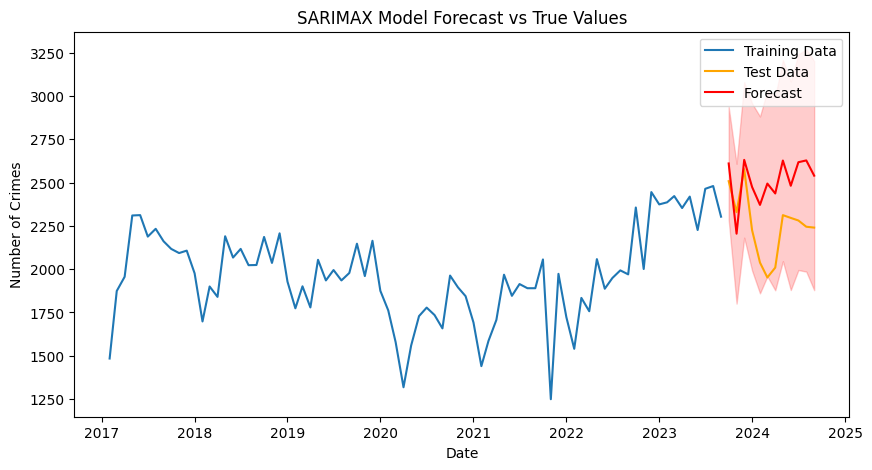

Mean Squared Error: 96908.48862617277
Root Mean Squared Error: 311.3012827249075
Standardized RMSE (relative to mean of test data): 0.13829466136157595


In [ ]:
#date column set to datetime format and set as the index
full_data = df.copy()
full_data['date'] = pd.to_datetime(full_data['date'])
full_data.set_index('date', inplace=True)

#seasonal decomposition with a specified period of 12 (for monthly data assuming annual seasonality)
monthly_crimes = full_data.resample('MS').size()
decomposition = seasonal_decompose(monthly_crimes, model='additive', period=12)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#trend component
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
ax1.set_xlabel('Date')

#seasonal component
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonal')
ax2.set_xlabel('Date')

#residual component
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residual')
ax3.set_xlabel('Date')

plt.tight_layout()
plt.show()

#split into training and testing sets
train = monthly_crimes.iloc[:-12]
test = monthly_crimes.iloc[-12:]

#fit SARIMA model on the training data
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit(disp=False)

#forecast the next 12 months corresponding to test data period
forecast = sarima_results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()
forecast_values = forecast.predicted_mean

#plotting the training data, test data, and forecast with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title('SARIMAX Model Forecast vs True Values')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

#mean squared error and the root mean squared error
mse = mean_squared_error(test, forecast_values)
rmse = sqrt(mse)

mean_of_test = test.mean()
#standardized RMSE
standardized_rmse = rmse / mean_of_test

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f"Standardized RMSE (relative to mean of test data): {standardized_rmse}")

### Visualizing Crime Locations

**Before moving onto the next ML we created a map to better visual the area of crime incidents**

In [ ]:
#analyzing PGPD Reporting Area distribution: most and least frequent areas
#how many pgpd_reporting_area in the df
reporting_areas_count = df['pgpd_reporting_area'].nunique()
print(f"There are {reporting_areas_count} unique pgpd_reporting_area in the DataFrame.")
top_10_reporting_areas = df['pgpd_reporting_area'].value_counts().head(10)
least_10_reporting_areas = df['pgpd_reporting_area'].value_counts().tail(10)

print("10 Most Occurred PGPD Reporting Areas:")
print(top_10_reporting_areas)

print("\n10 Least Occurred PGPD Reporting Areas:")
print(least_10_reporting_areas)

There are 402 unique pgpd_reporting_area in the DataFrame.
10 Most Occurred PGPD Reporting Areas:
pgpd_reporting_area
424    3061
407    2570
858    2471
441    2431
110    2325
313    2217
415    2154
701    2094
427    1781
135    1745
Name: count, dtype: int64

10 Least Occurred PGPD Reporting Areas:
pgpd_reporting_area
759     4
950     4
959     4
948     4
7957    3
7936    3
942     3
173     3
7946    3
943     1
Name: count, dtype: int64


In [ ]:
#outlier detection: deleting rows with wrong coordinates
map_df = df.copy()
def detect_outliers(map_df):
    #calculate Z-scores
    def z_score_outliers(series):
        mean = series.mean()
        std = series.std()
        z_scores = [(x - mean) / std for x in series]
        return np.abs(z_scores) > 3  #z-score beyond 3 is outlier


    #outliers in latitude and longitude
    map_df['lat_outlier'] = z_score_outliers(map_df['latitude'])
    map_df['lon_outlier'] = z_score_outliers(map_df['longitude'])

    #outlier rows
    outliers = map_df[(map_df['lat_outlier'] == True) | (map_df['lon_outlier'] == True)]

    return outliers

outliers = detect_outliers(map_df)
print("Detected Outliers:")
print(outliers[['latitude', 'longitude']])
print("\n Number of wrong records:", outliers.shape[0])


Detected Outliers:
        latitude  longitude
1436   -0.000074   0.000021
5169   -0.000074   0.000021
11799  -0.000074   0.000021
13424  -0.000074   0.000021
18048  -0.000074   0.000021
20063  -0.000074   0.000021
23314  -0.000074   0.000021
26265  -0.000074   0.000021
27926  -0.000074   0.000021
40157  -0.000074   0.000021
42620  -0.000074   0.000021
49697  -0.000074   0.000021
64443  -0.000074   0.000021
64602  -0.000074   0.000021
68542  -0.000074   0.000021
73299  -0.000074   0.000021
77097  -0.000074   0.000021
77201  -0.000074   0.000021
79598  -0.000074   0.000021
82224  -0.000074   0.000021
88485  -0.000074   0.000021
90041  -0.000074   0.000021
90215  -0.000074   0.000021
93878  -0.000074   0.000021
94361  -0.000074   0.000021
96067  -0.000074   0.000021
98660  -0.000074   0.000021
99496  -0.000074   0.000021
103605 -0.000074   0.000021
104649 -0.000074   0.000021
105925 -0.000074   0.000021
116968 -0.000074   0.000021
117601 -0.000074   0.000021
119131 -0.000074   0.000021
1

In [ ]:
#visualizing outliers to ensure that they are misregistered
def plot_outliers(outliers):

    map_center = [outliers['latitude'].mean(), outliers['longitude'].mean()]
    map = folium.Map(location=map_center, zoom_start=3)

    marker_cluster = MarkerCluster().add_to(map)

    for idx, row in outliers.iterrows():
        folium.Marker(
            [row['latitude'], row['longitude']],
            icon=folium.Icon(color='red'),
            popup=f"Latitude: {row['latitude']}, Longitude: {row['longitude']}"
        ).add_to(marker_cluster)

    display(map)

plot_outliers(outliers)

In [ ]:
#delete the rows from the df that have outliers
print("Previous DF size:", df.shape)
df = df.drop(outliers.index)
print("New DF size:", df.shape)
map_df = df.copy()

Previous DF size: (184509, 12)
New DF size: (184453, 12)


In [ ]:
#pgpd_area number can be found from the map below by clicking the corresponding pin
def plot_area_centers(df):
    area_df = df.copy()
    centers = area_df.groupby('pgpd_reporting_area').agg({
        'latitude': 'mean',
        'longitude': 'mean'
    }).reset_index()
    map = folium.Map(location=[centers['latitude'].mean(), centers['longitude'].mean()], zoom_start=10)
    for _, row in centers.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"PGPD Area: {row['pgpd_reporting_area']}"
        ).add_to(map)
    display(map)
plot_area_centers(df)

In [ ]:
#visualize of incident types by PGPD Reporting Area
#function to create map
def plot_map(pgpd_area):
    #filter df for the specified reporting area
    mapdata = df.copy()
    area_data = mapdata[mapdata['pgpd_reporting_area'] == pgpd_area]
    print("\nNumber of incidents in the area ", pgpd_area, "is:", area_data['incident_case_id'].count(),"\n")
    #is there any data to plot
    if area_data.empty:
        print("No data available for the specified PGPD Reporting Area.")
        return

    #create a map centered around the first location in the filtered data
    map_center = [area_data.iloc[0]['latitude'], area_data.iloc[0]['longitude']]
    map = folium.Map(location=map_center, zoom_start=14)

    colors = {
        "ACCIDENT": "blue",
        "ASSAULT": "red",
        "AUTO, STOLEN": "gray",
        "B & E": "lightred",
        "HOMICIDE": "black",
        "ROBBERY": "green",
        "SEX OFFENSE": "pink",
        "THEFT": "darkpurple",
        "VANDALISM": "orange"
    }
    incident_counts = area_data['clearance_code_inc_type'].value_counts()

    type_counts = {key: 0 for key in colors}

    #classify each incident
    for idx, row in area_data.iterrows():
        incident_type = row['clearance_code_inc_type']
        #check if incident type contains the keyword
        for key in colors.keys():
            if key in incident_type:
                type_counts[key] += 1
                break

    #count and color of each main type
    for incident_type, count in type_counts.items():
        if count > 0:  #only print types that are present
            print(f"{incident_type}: Count = {count}, Color = {colors[incident_type]}")


    #duplicate locations
    location_counts = area_data['location'].value_counts()

    marker_cluster = MarkerCluster().add_to(map)

    for idx, row in area_data.iterrows():
        #color by incident type, default to pink if not listed
        incident_type = row['clearance_code_inc_type']
        color = next((colors[key] for key in colors if key in incident_type), 'pink')
        popup_text = f"{incident_type}"
        if location_counts[row['location']] > 1:
            #cluster if duplicates
            folium.Marker(
                [row['latitude'], row['longitude']],
                popup=popup_text,
                icon=folium.Icon(color=color)
            ).add_to(marker_cluster)
        else:
            #regular marker if unique location
            folium.Marker(
                [row['latitude'], row['longitude']],
                popup=popup_text,
                icon=folium.Icon(color=color)
            ).add_to(map)

    display(map)

#prompt for user input
pgpd_area_input = int(input("Enter PGPD Reporting Area Code: "))
plot_map(pgpd_area_input)

Enter PGPD Reporting Area Code: 214

Number of incidents in the area  214 is: 445 

ACCIDENT: Count = 134, Color = blue
ASSAULT: Count = 28, Color = red
AUTO, STOLEN: Count = 32, Color = gray
B & E: Count = 27, Color = lightred
HOMICIDE: Count = 1, Color = black
ROBBERY: Count = 15, Color = green
SEX OFFENSE: Count = 2, Color = pink
THEFT: Count = 200, Color = darkpurple
VANDALISM: Count = 6, Color = orange


**Displaying Nearby Incidents Based on User-Selected Location within a 0.2 Mile (320 Meters) Range**

In [ ]:
#click on the map where you want to see incidents within a 0.2 mile range(this code copies the coordinate)

def create_interactive_map():
    global lat, lon

    m = Map(center=(38.89, -76.84), zoom=10, basemap=basemaps.OpenStreetMap.Mapnik)
    marker = None

    def handle_click(**kwargs):
        global lat, lon
        if kwargs.get('type') == 'click':
            coords = kwargs.get('coordinates')
            lat, lon = coords
            nonlocal marker
            if marker:
                m.remove_layer(marker)
            marker = Marker(location=coords)
            m.add_layer(marker)
            print("Latest clicked coordinates:", coords)

    m.on_interaction(handle_click)

    return m

lat = None
lon = None
interactive_map = create_interactive_map()
interactive_map




Map(center=[38.89, -76.84], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

Latest clicked coordinates: [38.976092133635085, -76.93450927734376]


In [ ]:
#this code plots the incidents within 0.2 mile of the location that clicked on previous code

input_coord = (lat, lon)

near_df = df.copy()

near_df['location'] = near_df['location'].apply(ast.literal_eval)
near_df['distance'] = near_df['location'].apply(lambda loc: haversine(input_coord, loc, unit=Unit.METERS))

near_df = near_df[near_df['distance'] <= 320]


def plot_near_map(near_df):
    mapdata = near_df.copy()
    print("\nNumber of incidents in this area is:", mapdata['incident_case_id'].count(),"\n")
    if mapdata.empty:
        print("No data available. Point is probably out of Prince George's County")
        return

    map_center = [lat, lon]
    map = folium.Map(location=map_center, zoom_start=17)

    colors = {
        "ACCIDENT": "blue",
        "ASSAULT": "red",
        "AUTO, STOLEN": "gray",
        "B & E": "lightred",
        "HOMICIDE": "black",
        "ROBBERY": "green",
        "SEX OFFENSE": "pink",
        "THEFT": "darkpurple",
        "VANDALISM": "orange"
    }
    incident_counts = mapdata['clearance_code_inc_type'].value_counts()

    type_counts = {key: 0 for key in colors}

    for idx, row in mapdata.iterrows():
        incident_type = row['clearance_code_inc_type']
        for key in colors.keys():
            if key in incident_type:
                type_counts[key] += 1
                break

    for incident_type, count in type_counts.items():
        if count > 0:
            print(f"{incident_type}: Count = {count}, Color = {colors[incident_type]}")


    location_counts = mapdata['location'].value_counts()

    marker_cluster = MarkerCluster().add_to(map)

    for idx, row in mapdata.iterrows():
        incident_type = row['clearance_code_inc_type']
        color = next((colors[key] for key in colors if key in incident_type), 'pink')
        popup_text = f"{incident_type}"
        if location_counts[row['location']] > 1:
            folium.Marker(
                [row['latitude'], row['longitude']],
                popup=popup_text,
                icon=folium.Icon(color=color)
            ).add_to(marker_cluster)
        else:
            folium.Marker(
                [row['latitude'], row['longitude']],
                popup=popup_text,
                icon=folium.Icon(color=color)
            ).add_to(map)
    folium.Marker(
        [lat, lon],
        popup="Input Location",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(map)
    display(map)
plot_near_map(near_df)


Number of incidents in this area is: 107 

ACCIDENT: Count = 17, Color = blue
ASSAULT: Count = 1, Color = red
AUTO, STOLEN: Count = 10, Color = gray
B & E: Count = 12, Color = lightred
ROBBERY: Count = 5, Color = green
SEX OFFENSE: Count = 4, Color = pink
THEFT: Count = 54, Color = darkpurple
VANDALISM: Count = 4, Color = orange


### K-Means

The next ML model is K-Means which is a unsupervised learning algorithm used for data clustering, which groups unlabeled data points into groups or clusters. We will be using K-Means to identify crime hotspots. [Learn more about K-Means](https://www.ibm.com/topics/k-means-clustering)

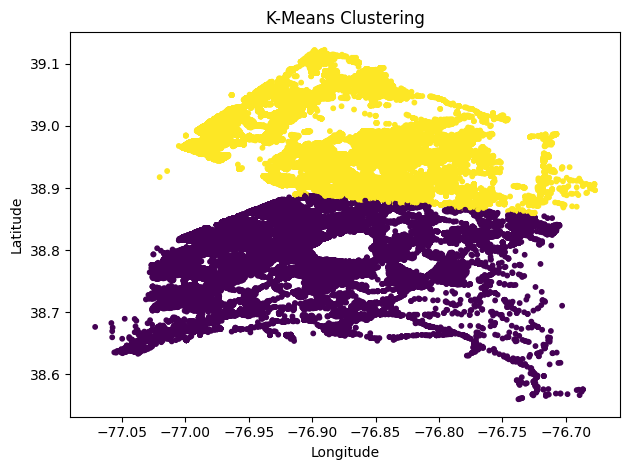

In [ ]:
#Latitude and Longitude data
geo_data = map_df[['latitude', 'longitude']].dropna()

#Standardized data for DBSCAN
scaler = StandardScaler()
geo_data_scaled = scaler.fit_transform(geo_data)

#K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  #may need to adjust
kmeans.fit(geo_data)

geo_data['kmeans_cluster'] = kmeans.labels_

#K-Means plot
plt.scatter(geo_data['longitude'], geo_data['latitude'], c=geo_data['kmeans_cluster'], cmap='viridis', s=10)
plt.title("K-Means Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")



plt.tight_layout()
plt.show()


In [ ]:
silhouette_kmeans = silhouette_score(geo_data[['latitude', 'longitude']], geo_data['kmeans_cluster'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

Silhouette Score for K-Means: 0.4403029420368679


We than apply the elbow method for K-means which is technique used to determine the optimal number of clusters for our data. It helps us decide how many clusters best fit our data

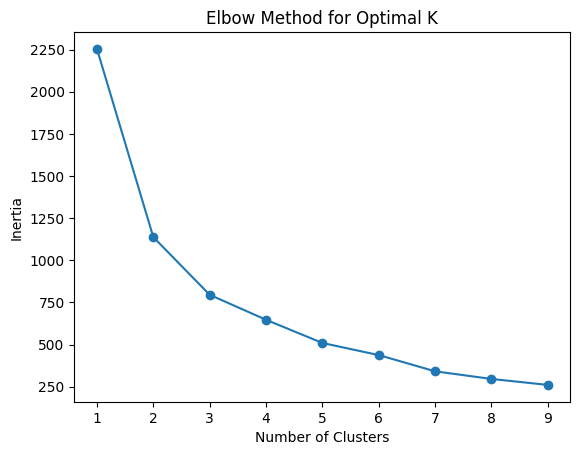

In [ ]:
#apply elbow method for K-Means
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(geo_data[['latitude', 'longitude']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

### KNN Classifier

This part finds the best k value for the KNN classifier by testing values from 1 to 20 using cross-validation. It calculates accuracy for each k and picks the one with the highest accuracy. A graph is also shown to help visualize the results.

The best value for k is: 18


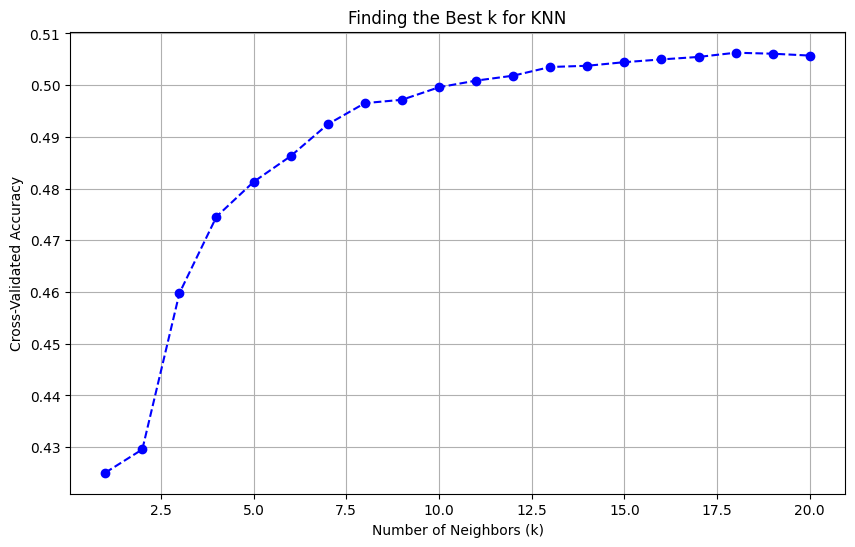

In [ ]:
# finding best k for knn classifier
X = df[['latitude', 'longitude']]
y = df['incident_type']

k_range = range(1, 21)

cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

best_k = k_range[np.argmax(cv_scores)]
print(f"The best value for k is: {best_k}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='--', color='b')
plt.title('Finding the Best k for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()


Here, the data is split into training (80%) and testing (20%) sets. The KNN model is trained with k=18, and predictions are made on the test data. The accuracy and a detailed classification report are displayed to evaluate how well the model works.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Classifier with k=18: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

X_train shape: (147562, 2)
X_test shape: (36891, 2)
y_train shape: (147562,)
y_test shape: (36891,)
Accuracy of KNN Classifier with k=18: 0.51

Classification Report:
              precision    recall  f1-score   support

    ACCIDENT       0.62      0.76      0.68     13718
     ASSAULT       0.27      0.04      0.08      1725
AUTO, STOLEN       0.29      0.19      0.23      5274
       B & E       0.27      0.05      0.08      1824
    HOMICIDE       0.00      0.00      0.00        68
     ROBBERY       0.23      0.04      0.06      1472
 SEX OFFENSE       0.00      0.00      0.00       264
       THEFT       0.47      0.63      0.54     11622
   VANDALISM       0.08      0.00      0.00       924

    accuracy                           0.51     36891
   macro avg       0.25      0.19      0.19     36891
weighted avg       0.46      0.51      0.47     36891



This shows the number of samples for each incident_type to check if the dataset is balanced. It helps understand why the model might perform better on some classes than others.

In [ ]:
print(y_train.value_counts())

incident_type
ACCIDENT        55194
THEFT           46489
AUTO, STOLEN    20882
B & E            7244
ASSAULT          6888
ROBBERY          5783
VANDALISM        3674
SEX OFFENSE      1077
HOMICIDE          331
Name: count, dtype: int64


### Decision Tree

The next model is a Decision Tree, which is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. We will be using this model to predict incident type. [Learn more about Decision Tree](https://www.ibm.com/topics/decision-trees)

In [ ]:
incident_type_counts = map_df['incident_type'].value_counts()

print(incident_type_counts)

To start off incident type is highly unbalanced (such as 'accident' is the majority class). This makes it challenging to fit a decision tree. Accuracy would not be an appropriate metric due to imbalanced classes, so ROC_AUC and F1 were used. Of the two, ROC_AUC performed better. To help with hyperparameter tuning, the grid search algorithm was implemented to test multiple parameter combinations.

In [ ]:
dt_data = map_df[['incident_type', 'pgpd_beat', 'pgpd_sector', 'pgpd_reporting_area']]

le = LabelEncoder()
dt_data['PGPD_Beat_encoded'] = le.fit_transform(dt_data['pgpd_beat'])
dt_data['PGPD_Sector_encoded'] = le.fit_transform(dt_data['pgpd_sector'])
dt_data['PGPD_Reporting_Area_encoded'] = le.fit_transform(dt_data['pgpd_reporting_area'])
dt_data['incident_type_encoded'] = le.fit_transform(dt_data['incident_type'])

X = dt_data[['PGPD_Beat_encoded', 'PGPD_Sector_encoded', 'PGPD_Reporting_Area_encoded']]
y = dt_data['incident_type_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create DecisionTreeClassifier model
tree_model = DecisionTreeClassifier(random_state=42)

#hyperparameter grid for tuning
param_grid = {
    'max_depth': range(3, 6),
    'min_samples_split': range(10, 20),
    'min_samples_leaf': range(10, 20),
}

#grid search with ROC AUC as the scoring metric
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='roc_auc_ovr')
grid_search.fit(X_train, y_train)

#best hyperparameters from grid search
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

best_tree_model = grid_search.best_estimator_

#ROC_AUC
y_pred_prob_best = best_tree_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob_best, multi_class='ovr')
print("Best Model ROC AUC:", roc_auc)

y_pred_best = best_tree_model.predict(X_test)

#metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
print("\nBest Model Accuracy:", accuracy_best)

f1_best = f1_score(y_test, y_pred_best, average='micro')
print("Best Model F1 Score:", f1_best)

precision_best = precision_score(y_test, y_pred_best, average='micro')
print("Best Model Precision Score:", precision_best)

recall_best = recall_score(y_test, y_pred_best, average='micro')
print("Best Model Recall Score:", recall_best)

print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))


#visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree_model, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree for Crime Prediction")
plt.show()

<ipython-input-47-7a62e4c18faf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_data['PGPD_Beat_encoded'] = le.fit_transform(dt_data['pgpd_beat'])
<ipython-input-47-7a62e4c18faf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_data['PGPD_Sector_encoded'] = le.fit_transform(dt_data['pgpd_sector'])
<ipython-input-47-7a62e4c18faf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

KeyboardInterrupt: 

In [ ]:
#decision tree above is undreadable, download pdf format
dot_data = export_graphviz(
    best_tree_model,
    out_file=None,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = Source(dot_data)
graph.render("decision_tree")  #save file

**Decision Tree Interpretation**
Though the printed decision tree is difficult to read, the details can be seen in the downloaded PDF version. Based on the metrics and classification report, this model does not perform (ROC_AUC of 0.57) much better than randomly classifiying incident type. The imbalanced data if reflected in the poor branching seen in the tree and lack of pure nodes (ex. accident further broken down into accident, etc).

Another approach to this classifier would be to implement over/under-sampling with SMOTE with additional iterations.

### Random Forest

Following from that model will be random forest which is a a machine learning algorithm that combines multiple decision trees to make predictions. We will using this model to improve the prediction of incident type. [Learn more about Random Forest](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)

Feature engineering additional temporal columns such month, year, day of week, and is weekend as additional information can help improve model compared to the decision tree. SMOTE was applied to address the incident type (class) imbalance. The parameter grid originally included larger ranges of parameters, but was computationally unsuccessful. [Learn more about Under/over sampling](https://hersanyagci.medium.com/under-sampling-methods-for-imbalanced-data-clustercentroids-randomundersampler-nearmiss-eae0eadcc145)


In [ ]:
dt_data = map_df.copy()
dt_data['date'] = pd.to_datetime(dt_data['date'], errors='coerce')

#separate LabelEncoder for target and features
le_target = LabelEncoder()  #target variable (incident_type)
le_features = LabelEncoder()  #other categorical features

dt_data['month'] = dt_data['date'].dt.month
dt_data['year'] = dt_data['date'].dt.year
dt_data['day_of_week'] = dt_data['date'].dt.day_name()
dt_data['is_weekend'] = dt_data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

#encode categorical columns for features (except for the target column)
dt_data['PGPD_Beat_encoded'] = le_features.fit_transform(dt_data['pgpd_beat'])
dt_data['PGPD_Sector_encoded'] = le_features.fit_transform(dt_data['pgpd_sector'])
dt_data['PGPD_Reporting_Area_encoded'] = le_features.fit_transform(dt_data['pgpd_reporting_area'])
dt_data['day_of_week_encoded'] = le_features.fit_transform(dt_data['day_of_week'])

#encode the target variable (incident_type) separately
dt_data['incident_type_encoded'] = le_target.fit_transform(dt_data['incident_type'])

#define x and y
X = dt_data[['PGPD_Beat_encoded', 'PGPD_Sector_encoded',
             'PGPD_Reporting_Area_encoded', 'month',
             'day_of_week_encoded', 'is_weekend', 'year']]
y = dt_data['incident_type_encoded']

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE for oversampling minority classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#random forest classifier
rf_model = RandomForestClassifier(random_state=42)

#parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

#grid search + cross validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

#best model
print(f"Best parameters found: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

#predict
y_pred_best = best_rf_model.predict(X_test)
y_pred_prob_best = best_rf_model.predict_proba(X_test)

#ROC AUC
roc_auc_best = roc_auc_score(y_test, y_pred_prob_best, multi_class='ovr')
print("Best Model ROC AUC:", roc_auc_best)

#classification Report for the best model
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))

#F1 Score for the best model
f1_best = f1_score(y_test, y_pred_best, average='weighted')
print(f"\nBest Model F1 Score: {f1_best:.2f}")

#confusion Matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("\nBest Model Confusion Matrix:")
print(conf_matrix_best)

#confusion Matrix for the best model
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Incident Type")
plt.ylabel("True Incident Type")
plt.show()

**Random Forest Interpretation**
Based on the best parameters, it's evident that the ideal model is quite dense, reflecting that it's still difficult to differentiate incident types after oversampling minority classes. The relatively high number of misclassifications can be seen in the confusion matrix. However, model does improve based on ROC_AUC (0.623) when compared to decision tree, although slightly.

To further address the imbalanced data issue, a neural network was created with the increased complexity ideally improving performance.

**Feature engineering to classify the problem more accurately**

Since we want to understand what kind of crime is happening and predict which kind of crime will occur, we will engineer a new column called "violent" where 0 means a nonviolent incident and 1 means violent. Additionally, a new dataset will be brought in that contained the coordinates of all police stations within PG county. When comparing the incident coordinates to the nearest police station coordinates, we will calculatae the distance to the police station and utilize this as a feature.

In [ ]:
# Pulled in df for police station coordinates, that is the only important info from this csv
police_df = pd.read_csv('Map_of_County_Police_Stations.csv')

In [ ]:
# Making a new dataframe to make adjustments to
rf_df = df[['date', 'clearance_code_inc_type', 'latitude', 'longitude']]
violent_map = {'SEX OFFENSE', 'ASSAULT, WEAPON', 'ASSAULT', 'ASSAULT, SHOOTING', 'HOMICIDE'}
rf_df['violent'] = rf_df['clearance_code_inc_type'].apply(lambda x: 1 if x in violent_map else 0)
rf_df

<ipython-input-50-da25de05a3be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df['violent'] = rf_df['clearance_code_inc_type'].apply(lambda x: 1 if x in violent_map else 0)


,date,clearance_code_inc_type,latitude,longitude,violent
0,2017-02-02,ACCIDENT,38.980819,-76.846938,0
1,2017-02-03,ACCIDENT,38.787250,-76.998513,0
2,2017-02-03,THEFT FROM AUTO,38.982131,-76.937817,0
3,2017-02-03,THEFT,38.866974,-76.892214,0
4,2017-02-03,ACCIDENT,38.852866,-76.913211,0
...,...,...,...,...,...
184502,2024-09-30,THEFT FROM AUTO,38.819402,-76.997528,0
184503,2024-09-30,"AUTO, STOLEN",39.004769,-76.981452,0
184504,2024-09-30,"AUTO, STOLEN",38.839743,-76.900744,0
184505,2024-09-30,ACCIDENT WITH IMPOUND,38.924717,-76.818395,0


In [ ]:
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
# Get the coordinates of Station Address using geolocator and store
stations = police_df['Station Address'].unique()
station_coordinates = []
for station in stations:
    coord = station.split(sep='\n')[-1]
    station_coordinates.append(coord)

In [ ]:
# Some gross string manipulation to get coordinates
def str_to_tuple(string):
    try:
      return tuple(map(float, string.strip('()').split(',')))
    except:
        raise ValueError(string)

In [ ]:
for i in range(len(station_coordinates)):
    station_coordinates[i] = str_to_tuple(station_coordinates[i])
rf_df['latitude'] = rf_df['latitude'].astype(float)
rf_df['longitude'] = rf_df['longitude'].astype(float)

<ipython-input-54-3845cd612f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df['latitude'] = rf_df['latitude'].astype(float)
<ipython-input-54-3845cd612f18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df['longitude'] = rf_df['longitude'].astype(float)


In [ ]:
# This function is fast but bc it runs on the whole df, takes a while
def get_distance(lat1, lon1, station_tup):
    return geodesic((lat1, lon1), (station_tup[0], station_tup[1])).miles

In [ ]:
# This guy takes a long time :( best to only run once
rf_df['distance_from_station'] = rf_df.apply(lambda x: min([get_distance(x['latitude'], x['longitude'], station) for station in station_coordinates]), axis=1)

<ipython-input-57-d7776d25b3a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df['distance_from_station'] = rf_df.apply(lambda x: min([get_distance(x['latitude'], x['longitude'], station) for station in station_coordinates]), axis=1)


In [ ]:
# This guy also take awhile
rf_df['nearest_station'] = rf_df.apply(lambda x: min([station for station in stations], key=lambda station: get_distance(x['latitude'], x['longitude'], str_to_tuple(station.split(sep='\n')[-1]))), axis=1)

<ipython-input-58-ef939e42796b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df['nearest_station'] = rf_df.apply(lambda x: min([station for station in stations], key=lambda station: get_distance(x['latitude'], x['longitude'], str_to_tuple(station.split(sep='\n')[-1]))), axis=1)


In [ ]:
rf_df['nearest_station'] = rf_df['nearest_station'].apply(lambda x: x.split(sep='\n')[0])
rf_df = rf_df[rf_df['distance_from_station'] < 20]

<ipython-input-60-a41347855d71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_df['nearest_station'] = rf_df['nearest_station'].apply(lambda x: x.split(sep='\n')[0])


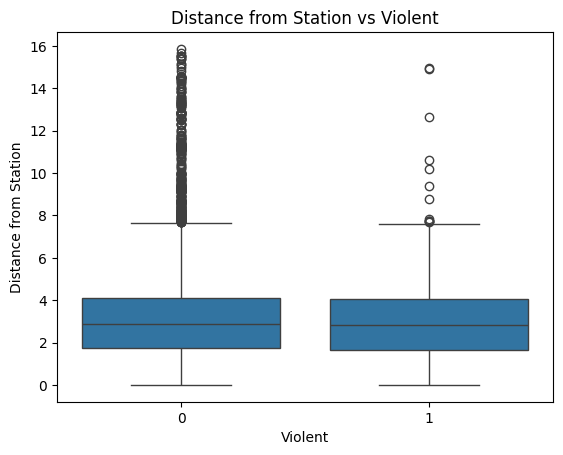

In [ ]:
# Visualize what the data is looking like for the binary label
sns.boxplot(x='violent', y='distance_from_station', data=rf_df)
plt.xlabel('Violent')
plt.ylabel('Distance from Station')
plt.title('Distance from Station vs Violent')
plt.show()

In [ ]:
rf_df['violent'].value_counts()

,count
violent,
0,174098
1,10353


We see that there isn't much of a difference in the distance between the two. Perhaps including the lat & long columns will assist in correctly classifying .

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = rf_df[['latitude', 'longitude', 'distance_from_station']]
y = rf_df['violent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall score:", recall)

Accuracy: 0.9373831015694885
F1 score: 0.060211554109031735
Recall score: 0.03569705740472745


We see that while we have a large accuracy, the disparity between the two labels shows that this wouldn't help much in the long run. So we will apply a sampling method to even them out and then reapply a random forest.

In [ ]:
# rebalance the data so theres an even amount of 0 data and 1 data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_test, y_pred)
print("Recall score:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

Accuracy: 0.8261200459506031
Recall score: 0.8959449777905144
F1 score: 0.8377614319975347


**Data problem:** As seen in the above results, we are able to achieve an F1 score of 0.83 after resampling our data and also feature engineering. When applying a random forest to this new adjusted dataset and removing outliers, we are able to improve results results for categorizing violent and nonviolent crimes.

### Neural Network

Next we use Neural Network to add complexity in order to predict incident type. [Learn more about Neural Network with TensorFlow](https://www.tensorflow.org/tutorials/quickstart/beginner)

Some of the other parameters tried were:
Adam and RMSProp optimizers
Fewer layers
ReLu instead of Leaky ReLU (with differing alpha values)
Higher dropout for each layer
75-25% train and test split to increase generalizability
20-50 epochs. Various combinations of the changes above resulted in similar or lower model performance.

SMOTE was applied to address the incident type (class) imbalance.

The model does improve based on roc_auc when compared to decision tree, slightly.

In [ ]:
dt_data = map_df.copy()

dt_data['date'] = pd.to_datetime(dt_data['date'], errors='coerce')

dt_data['month'] = dt_data['date'].dt.month
dt_data['year'] = dt_data['date'].dt.year

#encode
le = LabelEncoder()
dt_data['PGPD_Beat_encoded'] = le.fit_transform(dt_data['pgpd_beat'])
dt_data['PGPD_Sector_encoded'] = le.fit_transform(dt_data['pgpd_sector'])
dt_data['PGPD_Reporting_Area_encoded'] = le.fit_transform(dt_data['pgpd_reporting_area'])
dt_data['incident_type_encoded'] = le.fit_transform(dt_data['incident_type'])

#time-based feature engineering
dt_data['day_of_week'] = dt_data['date'].dt.day_name()
dt_data['is_weekend'] = dt_data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
dt_data['day_of_week_encoded'] = le.fit_transform(dt_data['day_of_week'])

X = dt_data[['PGPD_Beat_encoded', 'PGPD_Sector_encoded',
             'PGPD_Reporting_Area_encoded', 'month',
             'day_of_week_encoded', 'is_weekend', 'year']]
y = dt_data['incident_type_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# neural network model
num_classes = len(np.unique(y))
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

#compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#train the model
history = model.fit(X_train_resampled, y_train_resampled,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

#evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

#predict probabilities for ROC-AUC
y_pred_prob = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")

#classification report
y_pred = np.argmax(y_pred_prob, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


**Neural Network Interpretation**
Even with various activation functions, parametes, and layers of different combinations, the neural network's best performance was with ROC_AUC of 0.616, which is comparable to Random Forest results.

It seems that these models will need to be further tuned and tested with additional features allowing for identifiable discrepancies.

### PCA

The next model we will be working on is a Principal component analysis (PCA) which reduces the number of dimensions in large datasets to principal components that retain most of the original information. We wil be using PCA to look at Crime Severity in diffferent areas. [Learn More about PCA](https://www.ibm.com/topics/principal-component-analysis)

In [ ]:
#kmeans_cluster column
map_df['kmeans_cluster'] = geo_data['kmeans_cluster'].values

In [ ]:
#aggregate statistics
cluster_data = map_df.groupby('kmeans_cluster').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'clearance_code_inc_type': 'count',   #total crime count
}).rename(columns={'clearance_code_inc_type': 'crime_count'})

# crime diversity (unique types of crimes per cluster)
cluster_data['crime_diversity'] = map_df.groupby('kmeans_cluster')['clearance_code_inc_type'].nunique()

print(cluster_data)

**Crime diversity:** The number of unique crime types (e.g., theft, assault) in each cluster. This is consistent between the twoclusters (22), meaning both of the clusters experience the same variety of crimes.

**Cluster 0 and 1** have similar crime count which tells us the crimes are distributed pretty evenly across the two regions.

In [ ]:
#normalize the data for fair comparisons
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_data[['crime_count', 'crime_diversity']])

In [ ]:
#PCA to combine features into a single severity score
pca = PCA(n_components=1)  #one component for severity
severity_scores = pca.fit_transform(normalized_data)
cluster_data['severity_score'] = severity_scores[:, 0]

#rank clusters by severity score
cluster_data = cluster_data.sort_values(by='severity_score', ascending=False)
print(cluster_data)

**Cluster 1:**
This cluster has a higher severity score, which represents a region with higher crime activity

**Cluster 0:**
This cluster has a lower severity score, which represents a region with lower crime activity

The scores are standardized (ranging from -1 to 1) to make them comparable. A positive score reflects higher severity, and a negative score reflects lower severity.

In [ ]:
plt.figure(figsize=(10, 8))

#scatter plot with marker size proportional to crime count
plt.scatter(
    cluster_data['longitude'],
    cluster_data['latitude'],
    c=cluster_data['severity_score'],
    cmap='coolwarm',
    s=cluster_data['crime_count'] / 500,
    alpha=0.7
)

#labels for each point
for i, row in cluster_data.iterrows():
    plt.text(
        row['longitude'],
        row['latitude'],
        f'Cluster {i}',
        fontsize=11,
        ha='right',
        color='black'
    )

#colorbar and axis labels
plt.colorbar(label='Crime Severity Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Severity by Cluster')
plt.grid(True)
plt.show()

This plot visualizes crime severity by cluster, using color to represent the severity score.

**Cluster 1 (Red):**This cluster has a severity score of 1.0 (as shown in your previous results). The red color on the scale indicates that it has a higer crime servity which represent a higher crime activity in that area.

**Cluster 0 (Blue):**This cluster has a severity score of -1.0.
The blue color indicates it is less severe compared to Cluster 1.

In [ ]:
silhouette_avg = silhouette_score(X, geo_data['kmeans_cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette score is a metric used to evaluate the quality of clustering in data. It ranges from -1 to 1 [Learn more about Silhouette score](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.silhouette_score.html)

The silhouette score we obtained was **0.234**. This result indicates moderately defined clusters, suggesting some overlap between the cluster boundaries.

The clusters provide valuable insights by highlighting geographic regions with varying levels of crime severity. These insights can guide targeted resource allocation and strategic interventions. Below, we illustrate this using a map.

In [ ]:
#base map
m = folium.Map(location=[38.9, -76.9], zoom_start=11)

#circle markers for each cluster
for idx, row in cluster_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10 + row['severity_score'] * 5,  # Scale radius by severity
        color='red' if row['severity_score'] > 0 else 'blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"""<b>Cluster {idx}</b><br>
                  Severity Score: {row['severity_score']:.2f}<br>
                  Crime Count: {row['crime_count']}<br>
                  Crime Diversity: {row['crime_diversity']}"""
    ).add_to(m)

m.save("cluster_severity_map.html")
m

The red cluster is closer to New carrollton which suggest that there is a higher crime activity.

The blue cluster is closer to Camp Springs, which indicate a safer or less severe crime area.

# Part 5: Insights and Conclusions

A crime dataset from PG county is a vital tool when applying data science, providing insights to enhance public safety, inform policy decisions, and support community well-being. By analyzing crim trends and patterns, stakeholderes like governments, law enforcement, and community organizations can allocate resources effectively and implement targeted interventions. Predictive analytics enable forecasting of crime hotspots, allowing for proactive measures to reduce criminal activity. Additionally, combining crime data with other datasets, such as those on education and employment, helps uncover root causes of crime, facilitating systemic solutions.

These datasets also promote transparency and trust by keeping the public informed about crime levels and trends. Open access empowers citizens, journalists, and advocacy groups to engage in collective problem-solving. Moreover, urban planners can use the data to design safer public spaces by addressing factors like lighting and surveillance in high-crime areas.

The first thing about the data that we were able to conclude is that we are able to forecast crime frequency over time fairly well with the SARIMAX predictions. The regular patterns across the years show repeating intervals, which allow SARIMAX to effectively be applied and show seasonal trends and have decent results with the test dataset. Some ways that this could have improved is by normalizing the dataset before splitting into train/test datasets so that we can compare the test result to a smaller scale but keeping the original values also offers information in itself about the results of SARIMAX forecasting.

Another important aspect of the geolocation data used in the dataset is that we are given coordinates for each incident within the dataset. This is valuable because we can then utilize Kmeans clustering to find "hotspots" or areas in which incidents are more likely to occur. This is done by looking at the incidents in terms of frequency and then adjusting k so that we have an optimal amount. This is done with the elbow method, showing us key areas throughout PG county. While not a predictive model, this does provide valuable information in terms of urban planning or insight into the crime activity over the past few years.

Now a label we want to focus on is the incident type. This label has many options and a large disparity between the balance of data. Our first crack at modeling this is to utilize KNN. After analyzing the results of the data and then optimizing the amount of neighbors to use, we are only about to get about 0.41 as F1 score so we will re-evaluate our modeling methods.

When analyzing the data, an important column that sounds like it could very easily categorized is the incident type. When utilizing a decision tree, the results are shown to that the model is not able to do too well and is severely overfitting on the features as shown by the pdf. This illustrates that either changes to features or model complexity are needed to improve model performance while also avoiding overfitting.

Now we look towards Random Forests as an ensemble method. Our first iteration of a random forest had similar results to the decision tree, showing not that much improvement despite using SMOTE as a resampling method. Afterwards, we transitioned to feature engineering. Changing the incident type to "violent" as a binary label. This time we had a better accuracy but then saw the sampling was an issue again so we applied imbalanced sampling to readjust our data. Then we reapplied our random forest model and was able to get 0.8 F1 score, which is better than before and showed that our data needed some changes before being able to label well.

Now that we were able to get an F1 score of 0.8, we sought higher results and used a neural network to do so. The results from this model were low like the decision tree and first random forest iteration. So we settle on the feature engineered random forest as our best iteration for incident categorization.

We look back at the Kmeans clustering done earlier to then elaborate a bit more on this information. To start off, we want to analyze the severity of the areas seen. To do this, we apply PCA to the clusters already generated to see the frequency and then use that information to get a severity score. One cluster is 1.0 and shows a high severity while the -1.0 is the complete opposite showing a lack of severity. This shows that further analysis can provide more information about a dataset that can be vital in the future.

In conclusion, the train of thought of the the data can be easily followed throughout the notebook. After the initial EDA conducted, we generated some visualizations to easily understand the data we are dealing with. The crime data had. alot of categorical data so we looked into exploring the effects of modeling on some of the important columns. The key ones that stood out was the coordinates and the incident type. After we started modeling methods, we tried various options to ensure we were getting the best predictive results. With these results, the reader should be able to take away that aspects such as violent crime, distance from a police station, actual location of the crime, and density of the crimes in the general area are all important features that can be used to understand the dataset and make informed decisions.

# Part 6: Data Science Ethics

Addressing Ethical Considerations in Crime Data Analysis

In this project, we analyzed crime data from Prince George's County, Maryland, spanning February 2017 to the present. Ethical considerations were at the forefront of our approach to ensure fairness, transparency, and reliability in the analysis.

Potential Biases in Data Collection:

The dataset was sourced from real-time police reports filed during incidents. This minimizes selection bias, as the data directly reflects reported crimes rather than being influenced by subjective sampling methods. However, potential biases in underreporting of certain crimes or variations(e.g., domestic violence or minor theft) due to societal stigma or or lack of trust in law enforcement, in reporting practices across years and regions were acknowledged. To address this, we focused on trends and patterns within the available data, recognizing that the analysis is limited to reported incidents.

Addressing Bias in Data Analysis:

The datasets contained no sensitive victim or demographic information of victim, eliminating risks of discrimination based on race, gender, or other personal attributes. Moreover, imbalances in crime type representation were noted, which could affect predictive modeling. To mitigate this, we employed strategies such as removing duplicates, handling missing values responsibly, and preprocessing data to ensure consistency. For example, we categorized incident types to simplify analysis while retaining the integrity of the data and monitored the performance of models across all crime types to ensure that the less common crimes are not overlooked.

Ensuring Transparency:

We documented every step of the data preparation and analysis process in detail, making the workflow accessible to non-technical audiences. This included explaining preprocessing steps such as merging datasets, handling outliers, and defining model parameters. By maintaining this transparency, we ensured that the analysis could be independently verified and replicated. Stakeholders can follow the reasoning behind the decisions made during the analysis, making the findings more trustworthy.

Mitigating Imbalances in Predictive Models:

Our predictive models (e.g., SARIMAX for forecasting, Decision Trees, and Neural Networks for classification) revealed limitations in their ability to predict incident types accurately. This was attributed to imbalanced data and insufficient features. To address this, we identified opportunities to enhance the dataset with additional features, and plan to explore advanced sampling techniques in future iterations.

Fairness and Community Impact:

The analysis avoided reinforcing stereotypes or targeting specific groups, as the focus was solely on spatial and temporal crime trends. The insights gained aim to inform public safety measures and resource allocation without compromising individual privacy or equality.

By meticulously addressing potential biases in data collection and analysis and ensuring transparency at every stage, this project exemplifies a commitment to the ethical standards. It highlights how data-driven insights can meaningfully enhance community safety and empower policymakers to make informed, equitable decisions. By prioritizing fairness and accountability, the findings are not only actionable and reliable but also aligned with the broader goals of fostering trust, and long-term impact. These efforts establish a robust foundation for responsible decision-making, instilling confidence among stakeholders and the public while paving the way for sustainable community improvement.